<a href="https://colab.research.google.com/github/axz91/RGC/blob/main/MRS_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nmrglue

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 3.9 MB/s eta 0:00:00


### 1D CSI MRS experiment (2D matrix).

In [ ]:
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt

# read in the data from a NMRPipe file
data_input = ng.fileio.bruker.read(
    dir='/content/drive/MyDrive/70_ENC2020/1/', bin_file="fid",
    pprog_file="pulseprogram")


data_input



/usr/local/lib/python3.10/dist-packages/nmrglue/fileio/bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')
/usr/local/lib/python3.10/dist-packages/nmrglue/fileio/bruker.py:1573: UserWarning: (18432,) cannot be shaped into (1024,)
  warn(f"{data.shape} cannot be shaped into {shape}")


({'procs': {'_coreheader': ['##TITLE=Parameter List, ParaVision 6.0.1',
    '##JCAMPDX=4.24',
    '##DATATYPE=Parameter Values',
    '##ORIGIN=Bruker BioSpin MRI GmbH',
    '##OWNER=nmrsu'],
   '_comments': ['$$ 2019-12-07 16:32:01.949 -0500  nmrsu@CZC642BNVQ',
    '$$ /opt/PV6.0.1/data/nmrsu/20191201_181536_V9_4T_GapR_1_1/70/pdata/1/procs',
    '$$ process /opt/PV6.0.1/prog/bin/parxserver'],
   'OFFSET': 4.99568064058648,
   'SF': 400.345847521031,
   'YMAX_p': 32766,
   'YMIN_p': 1},
  'FILE_SIZE': 73728},
 array([ -484, -1037,   648, ...,  1054,   825,     7], dtype=int32))

In [ ]:
import numpy as np

data = data_input[1]
# Ensure that the data array length is even
if len(data) % 2 != 0:
    raise ValueError("The array length must be even to form complex numbers.")

# Split the array into real and imaginary parts
real_parts = data[0::2]
imaginary_parts = data[1::2]

# Construct complex numbers as a list
complex_numbers_list = [r + 1j*i for r, i in zip(real_parts, imaginary_parts)]

# Convert the list to a NumPy array
complex_numbers = np.array(complex_numbers_list)

# Output the complex numbers
print(complex_numbers)

[-484.-1037.j  648.+1476.j 1218.+2000.j ...  770. -663.j 1931.+1054.j
  825.   +7.j]


In [ ]:
complex_numbers_2 = complex_numbers.reshape(36, 256).T


In [ ]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# READ THE 2048 X 2048 MATRIX
##############################

input_data = complex_numbers_2
#############################

# FFT the 2048 x 2048 matrix VIA THE AXIS 1
fft_data_dim1_axis_0 = np.fft.fft(input_data,axis=0)

# SHIFT OVER AXIS 1
fft_data_dim1_shift_0 = np.fft.fftshift(fft_data_dim1_axis_0,axes=(0)
)

# GET THE REAL NUMBER PART OF FIRST MATRIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim1_real = np.real(fft_data_dim1_shift_0)
# GET THE IMAG PART OF THE FIRST MARTIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim1_imag = np.imag(fft_data_dim1_shift_0)
# GET THE ABS VALUE OF FIRST MATRIX, RETURN 2048 X 2048 MATIRX FOR ABS VALUE
fft_data_dim1_abs = abs(fft_data_dim1_shift_0)





# FFT the 2048 x 2048 matrix VIA THE AXIA 2
fft_data_dim2_axis_1 = np.fft.fft(fft_data_dim1_shift_0, axis=1)
# SHIFT OVER AXIA 2
fft_data_dim2_shift_1 = np.fft.fftshift(fft_data_dim2_axis_1, axes=(1))



# GET THE REAL NUMBER PART OF SECOND MATRIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim2_real = np.real(fft_data_dim2_shift_1)
# GET THE IMAG PART OF THE SECOND MARTIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim2_imag = np.imag(fft_data_dim2_shift_1)
# GET THE ABS VALUE OF SECOND MATRIX, RETURN 2048 X 2048 MATIRX FOR ABS VALUE
fft_data_dim2_abs = np.abs(fft_data_dim2_shift_1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_columns_with_offsets_no_norm(data, start_column, end_column, x_offset, y_offset):

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(40, 40))

    # Plot each column as a separate line with horizontal and vertical offsets
    for i in range(start_column-1, end_column):  # Subtract 1 here to convert from 1-indexing to 0-indexing
        ax.plot(np.arange(data.shape[0]) + i*x_offset, data[:, i] + i*y_offset, label=f'Spectrum {i+1}')  # Add 1 here to convert back for the label

    # Add labels
    ax.set_xlabel('Rows (with offset)')
    ax.set_ylabel('Non-normalized Values (with offset)')

    # Show the legend
    ax.legend(loc='upper left')
    ax.set_title(f'Spectrum {start_column} to {end_column}', size=28)

    # Save the figure
    fig.savefig("1.pdf", format='pdf', bbox_inches='tight')

    # Show the plot
    #plt.show()

    #return fig


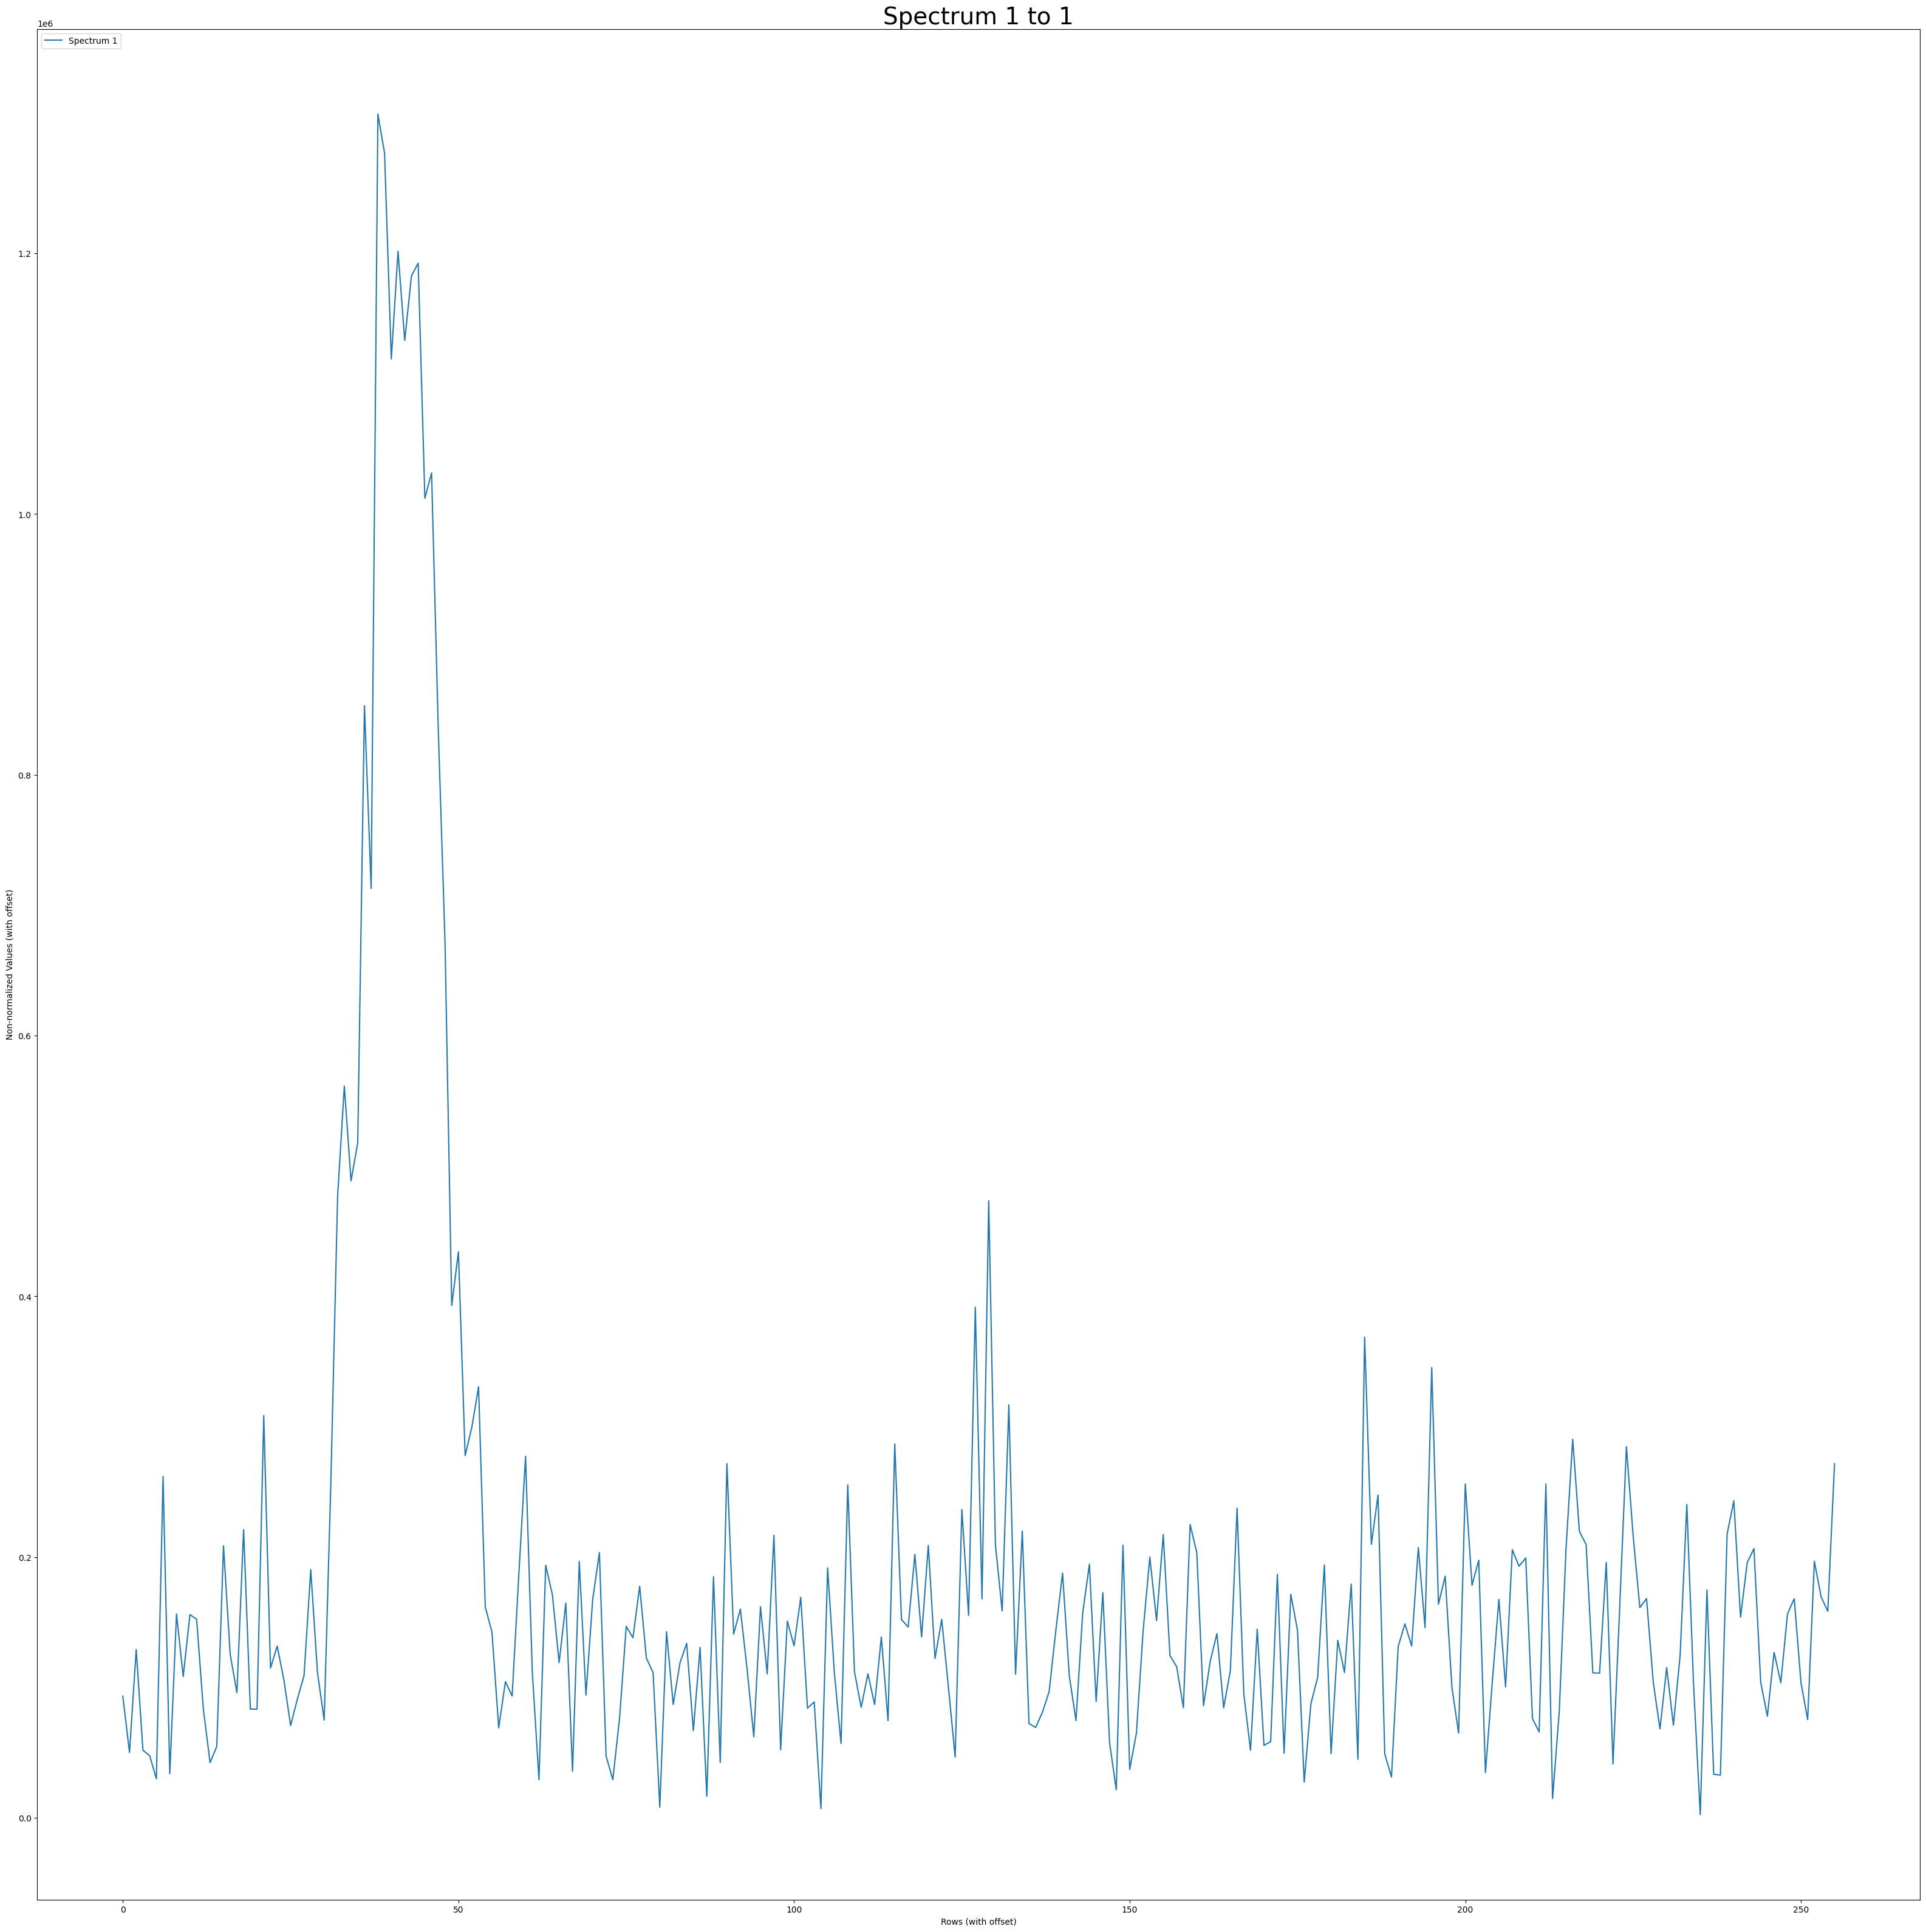

In [ ]:
plot_columns_with_offsets_no_norm(fft_data_dim2_abs,1,1,0,0)

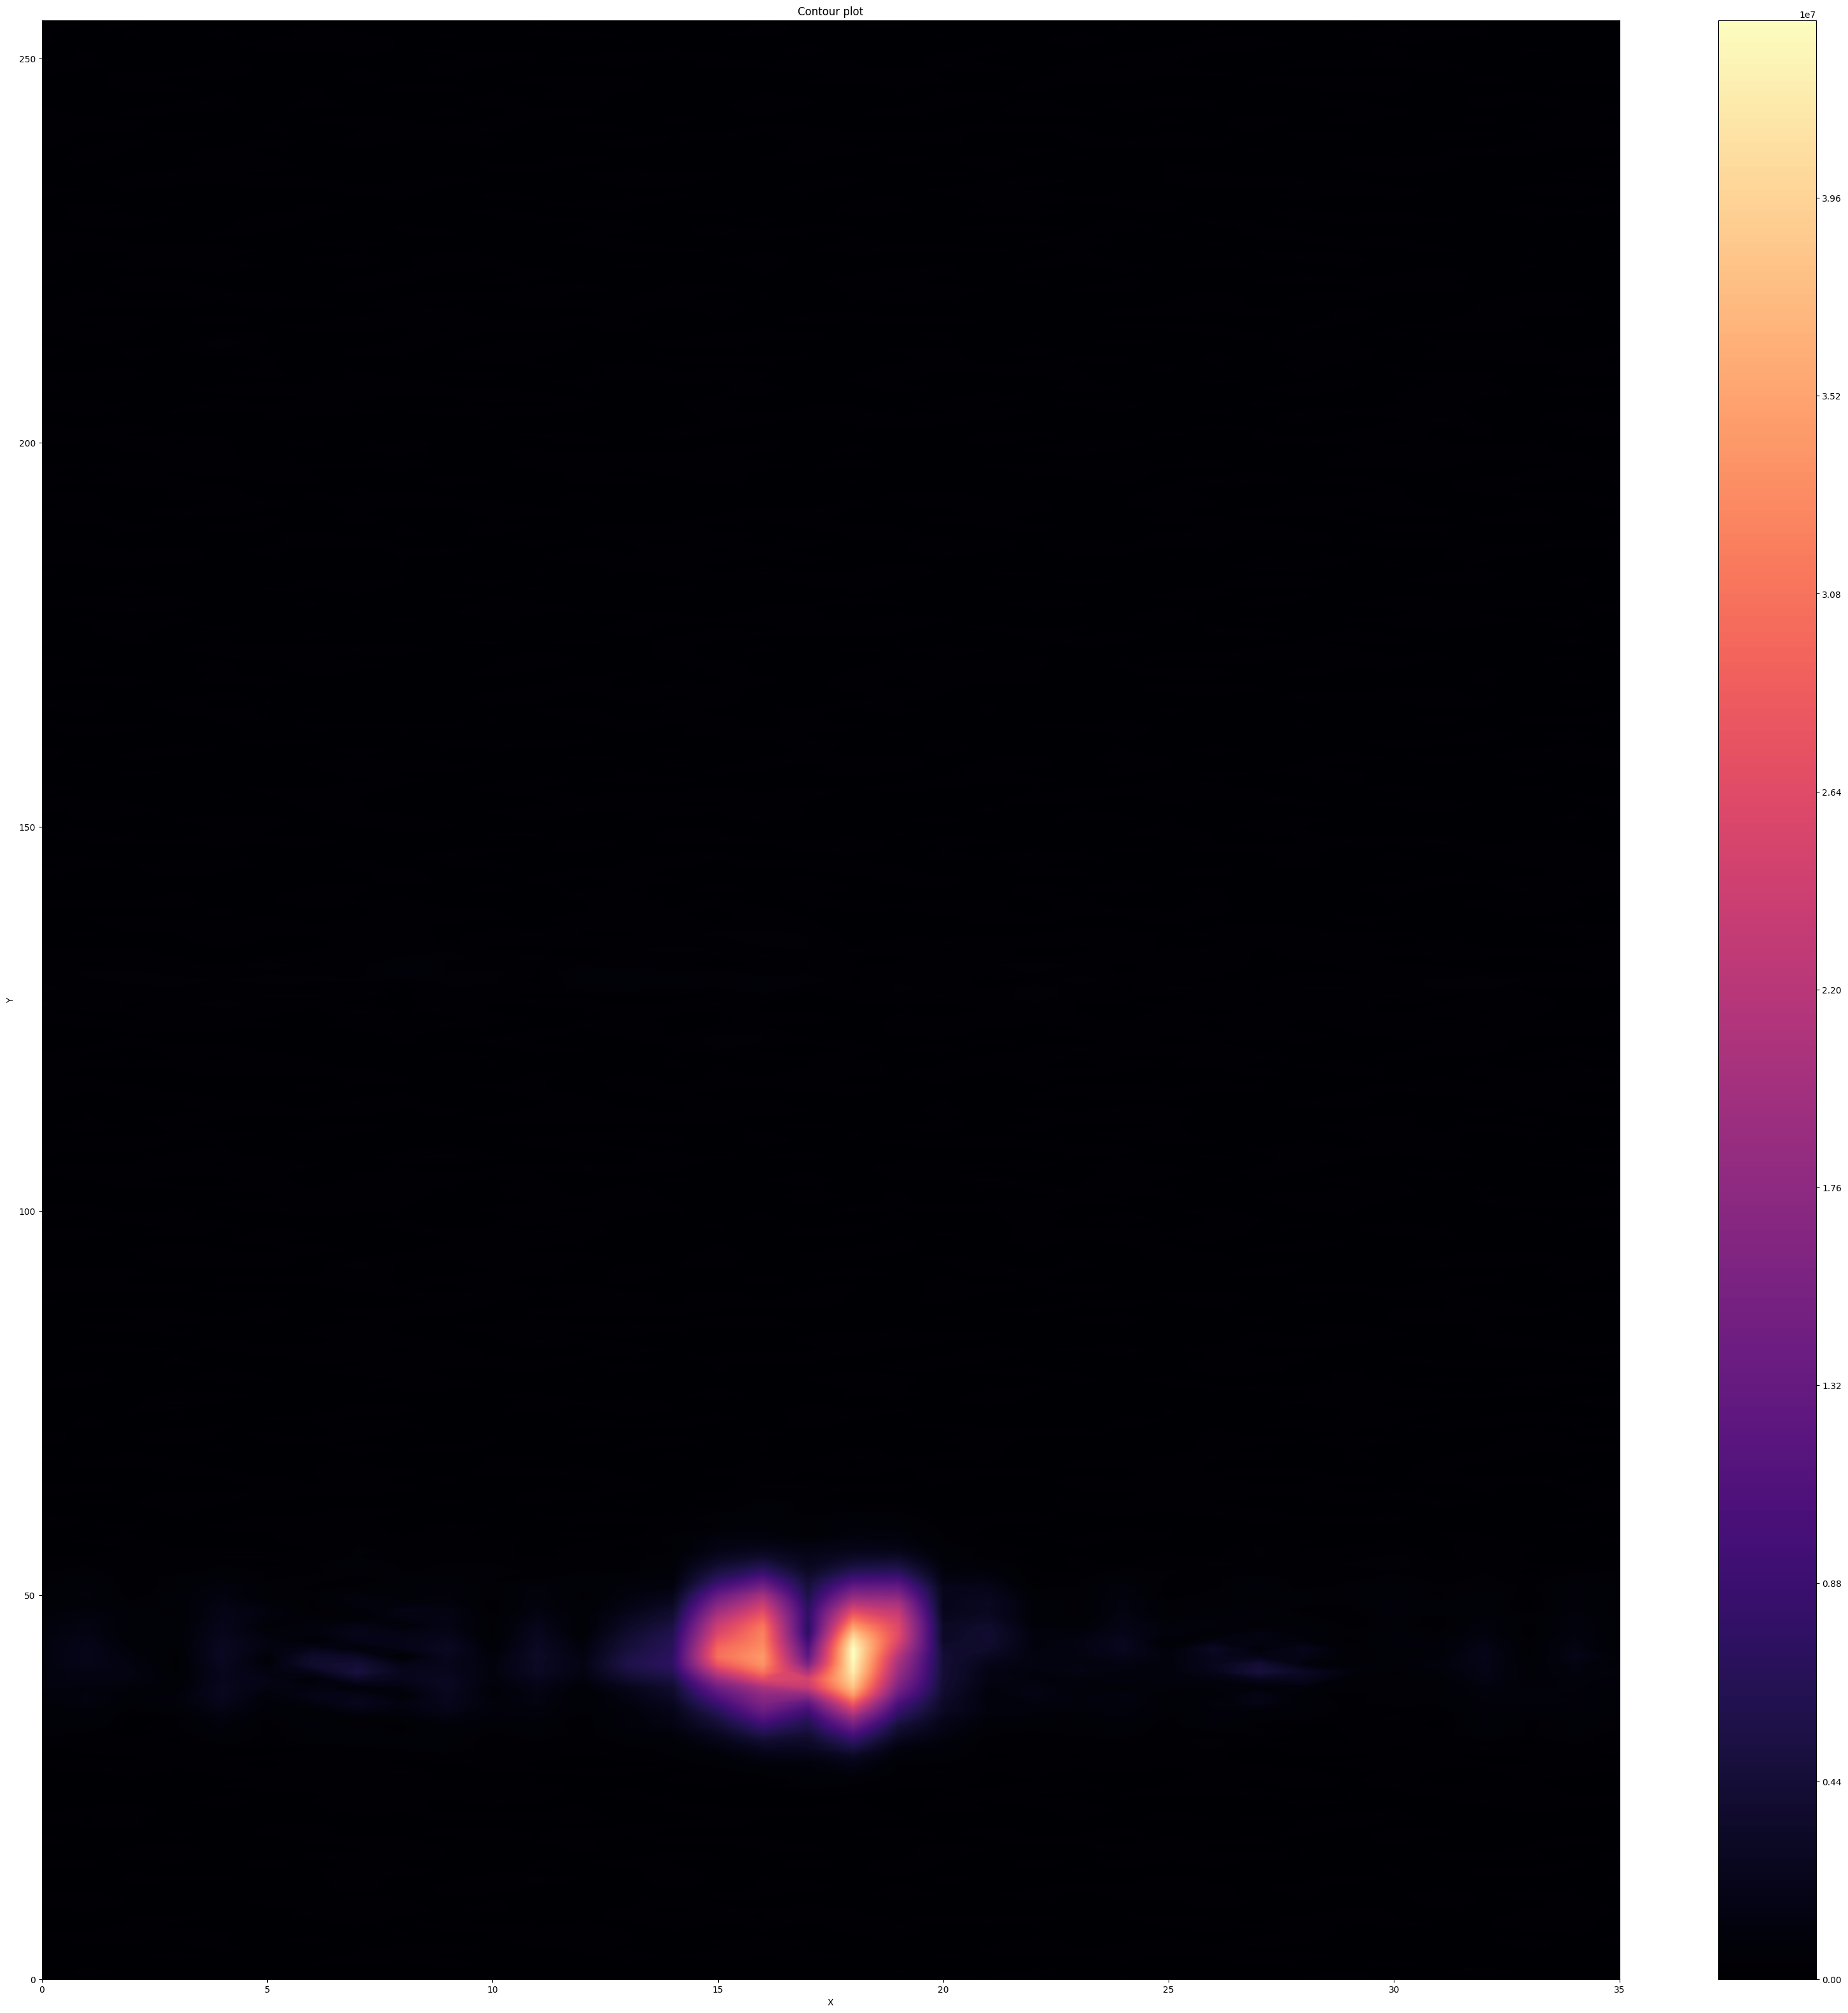

In [ ]:
from typing_extensions import dataclass_transform

import matplotlib.pyplot as plt
import numpy as np



plot_data = fft_data_dim2_abs
# assuming fft_data_dim2_abs is the 2D data
# generate grid for the contour plot
x = np.arange(0, plot_data.shape[1])
y = np.arange(0, plot_data.shape[0])
X, Y = np.meshgrid(x, y)

# Create the contour plot
plt.figure(figsize=(40, 40))
plt.contourf(X, Y, plot_data, levels=1000, cmap='magma')  # Increase levels for higher resolution
plt.colorbar()  # optional, to show color scale
plt.title('Contour plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show() # Change colormap





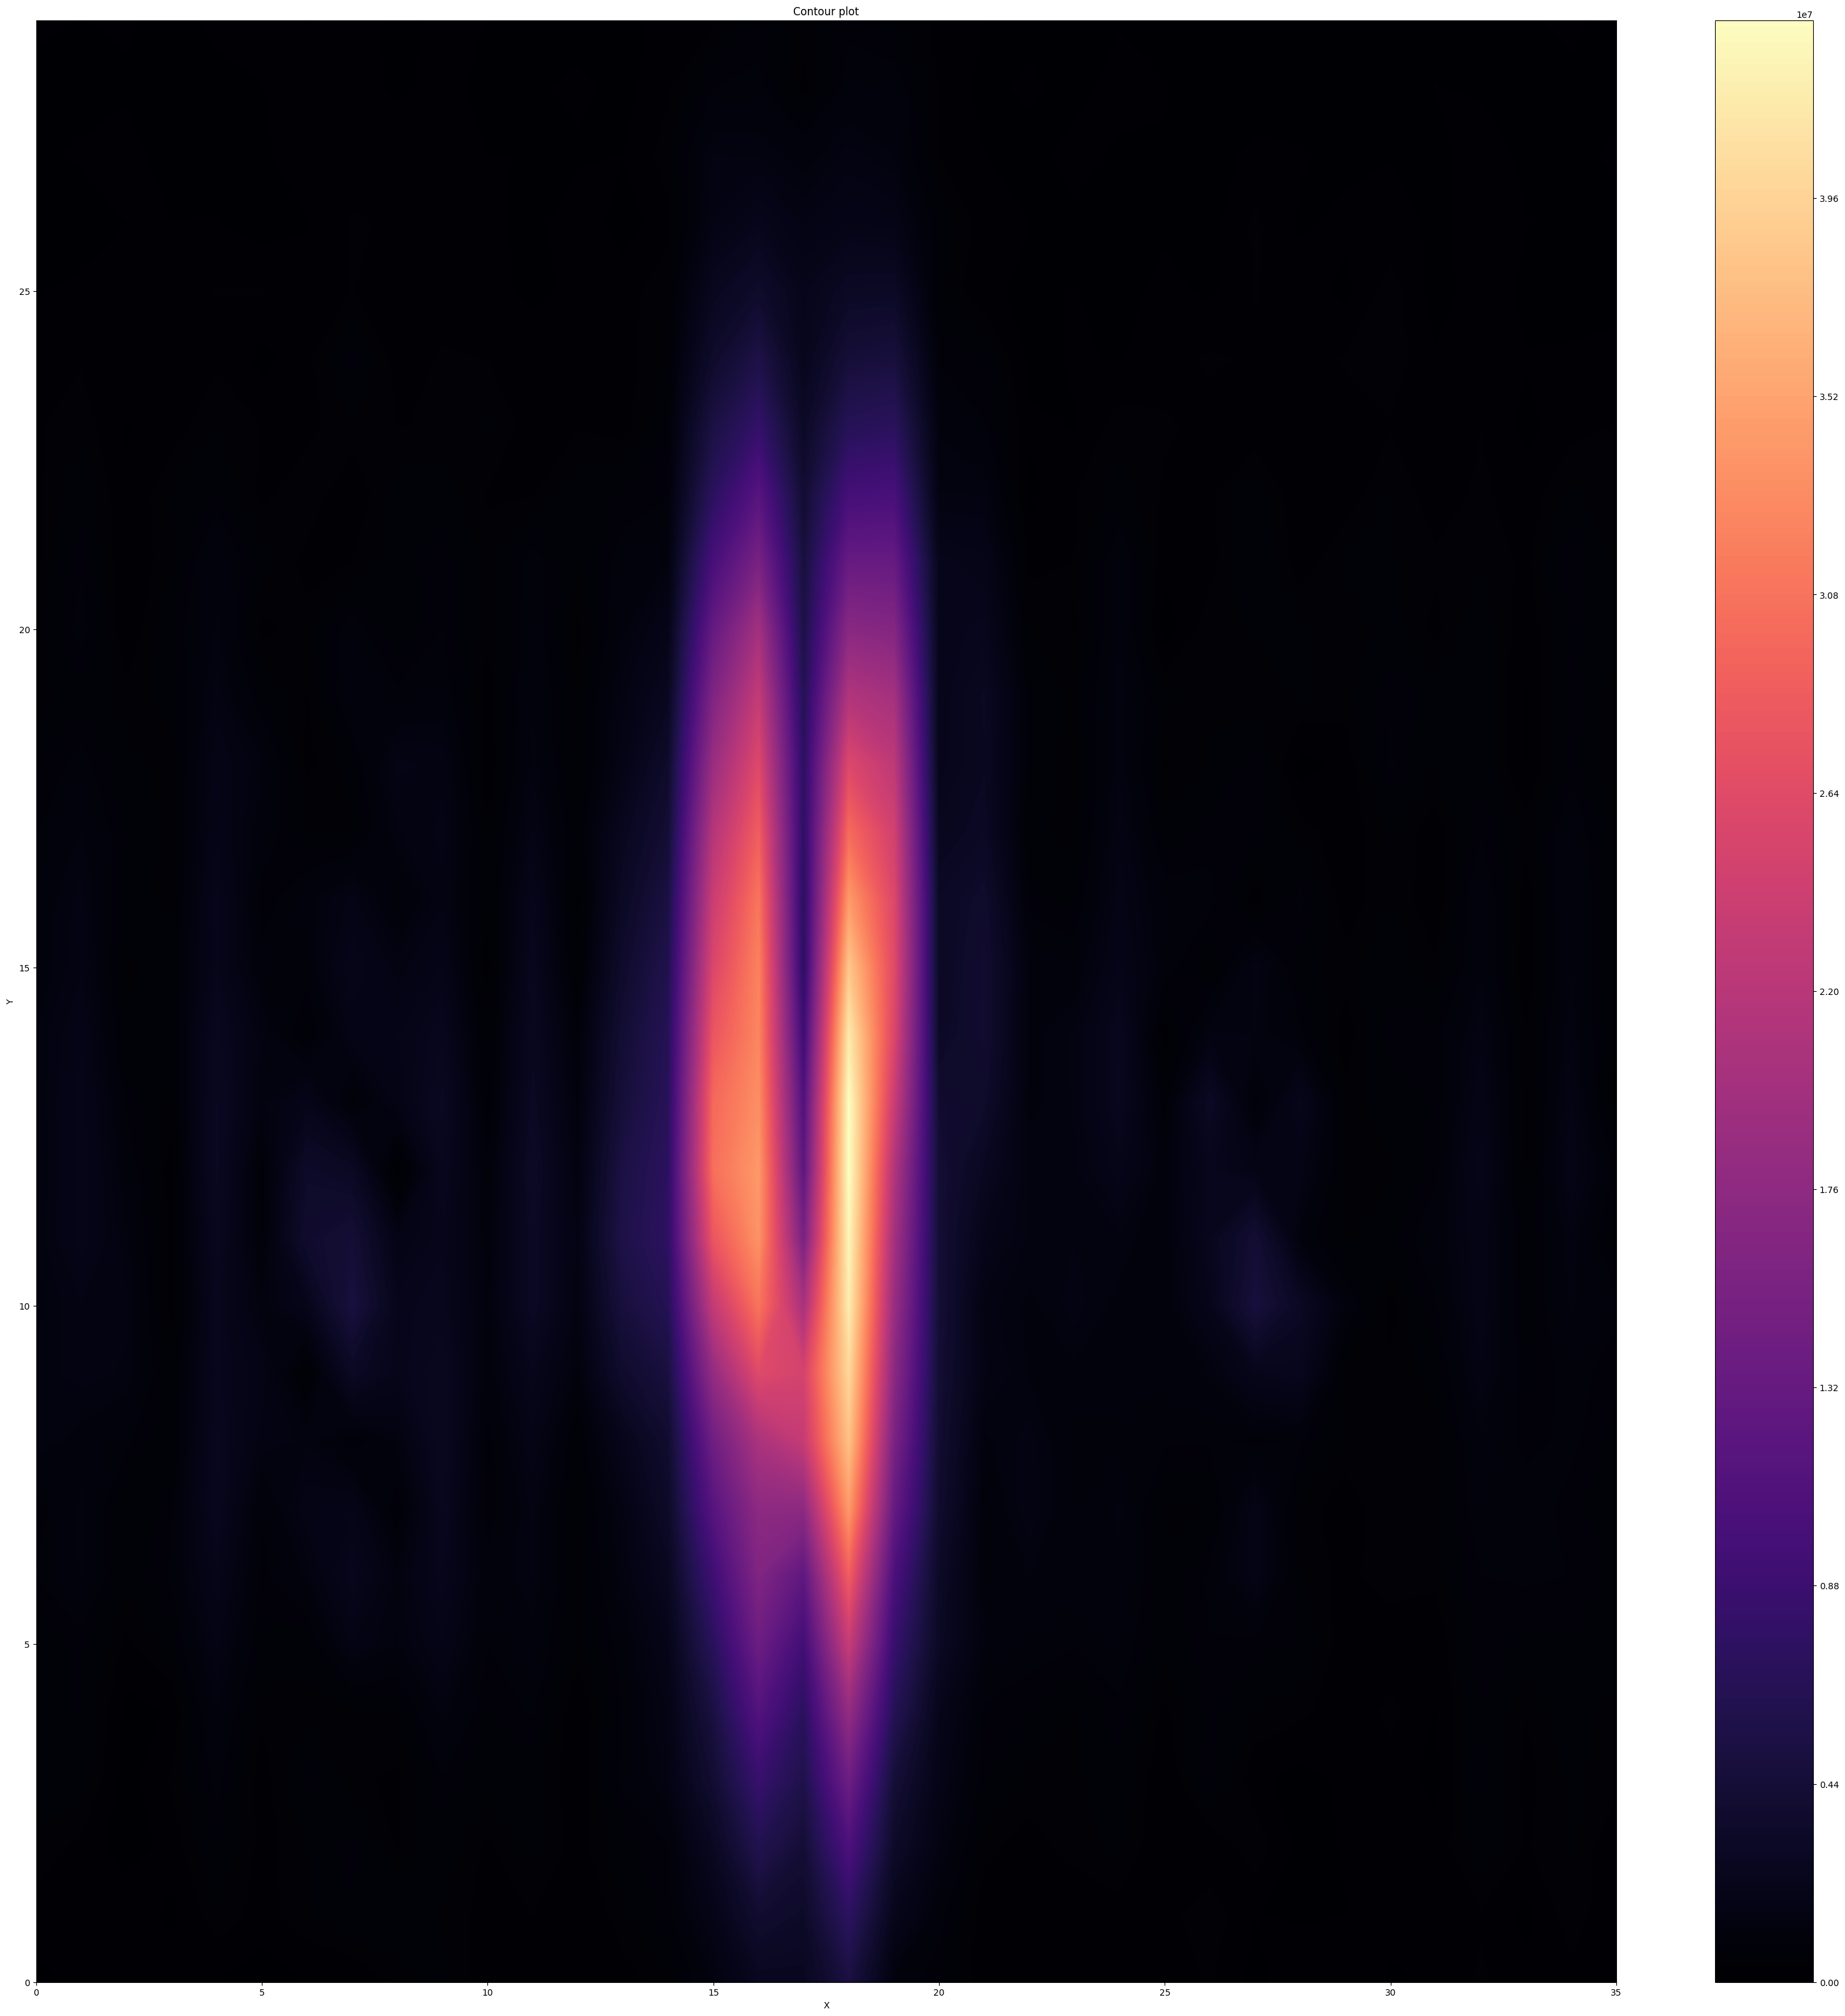

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# assuming fft_data_dim2_abs is the 2D data
plot_data = fft_data_dim2_abs

# generate grid for the contour plot, limiting y to values below 60
x = np.arange(0, plot_data.shape[1])
y = np.arange(0, min(30, plot_data.shape[0]))  # limit y to below 60
X, Y = np.meshgrid(x, y)

# also limit plot_data to y-values below 60
plot_data = plot_data[30:60, :]

# Create the contour plot
plt.figure(figsize=(40, 40))
plt.contourf(X, Y, plot_data, levels=1000, cmap='magma')  # Increase levels for higher resolution
plt.colorbar()  # optional, to show color scale
plt.title('Contour plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Min value: 4037.093133190294
Max value: 534191.0


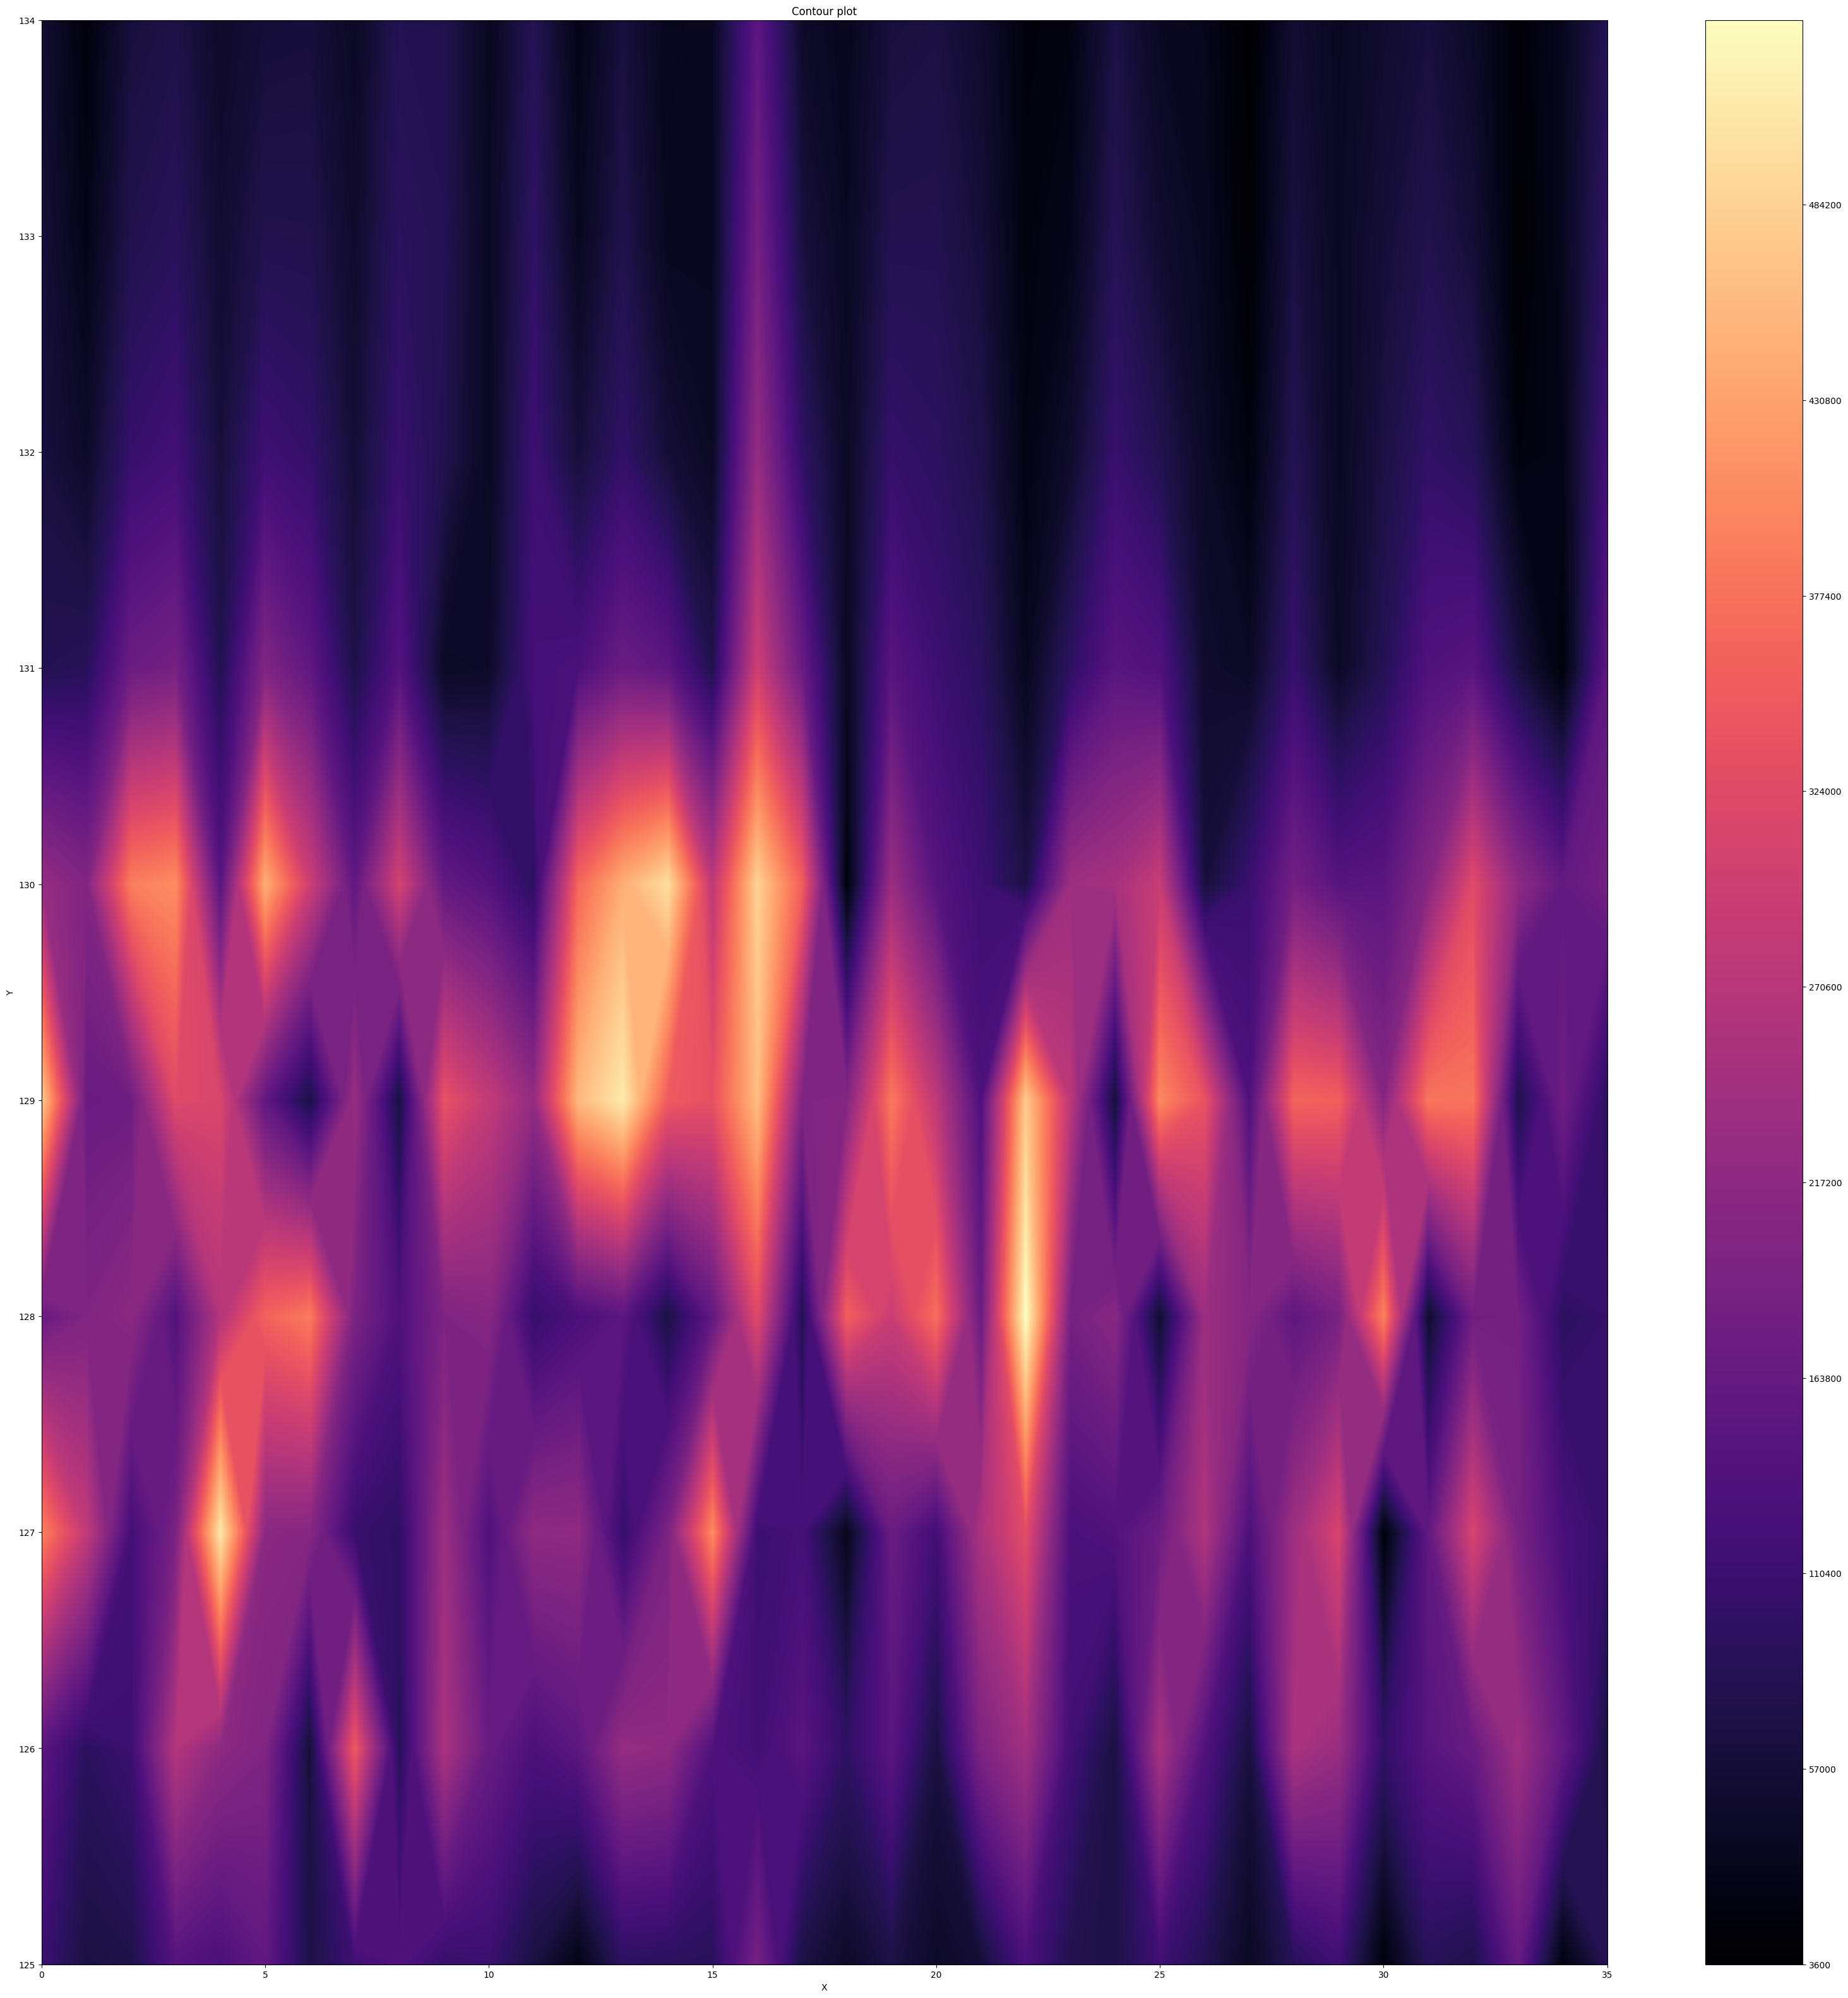

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# assuming fft_data_dim2_abs is the 2D data
plot_data = fft_data_dim2_abs

# generate grid for the contour plot, limiting y to values greater than 25 and less than or equal to 60
y_start = 125
y_end = min(135, plot_data.shape[0])
x = np.arange(0, plot_data.shape[1])
y = np.arange(y_start, y_end)
X, Y = np.meshgrid(x, y)

# limit plot_data to y-values between 26 and 60
plot_data = plot_data[y_start:y_end, :]

# Clip plot_data to a maximum value of 5035420
plot_data = np.clip(plot_data, a_min=0, a_max=534191)

# print the minimum and maximum values in plot_data
print("Min value:", np.min(plot_data))
print("Max value:", np.max(plot_data))

# Create the contour plot
plt.figure(figsize=(40, 40))
contour = plt.contourf(X, Y, plot_data, levels=1000, cmap='magma')
plt.colorbar(contour)
plt.title('Contour plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

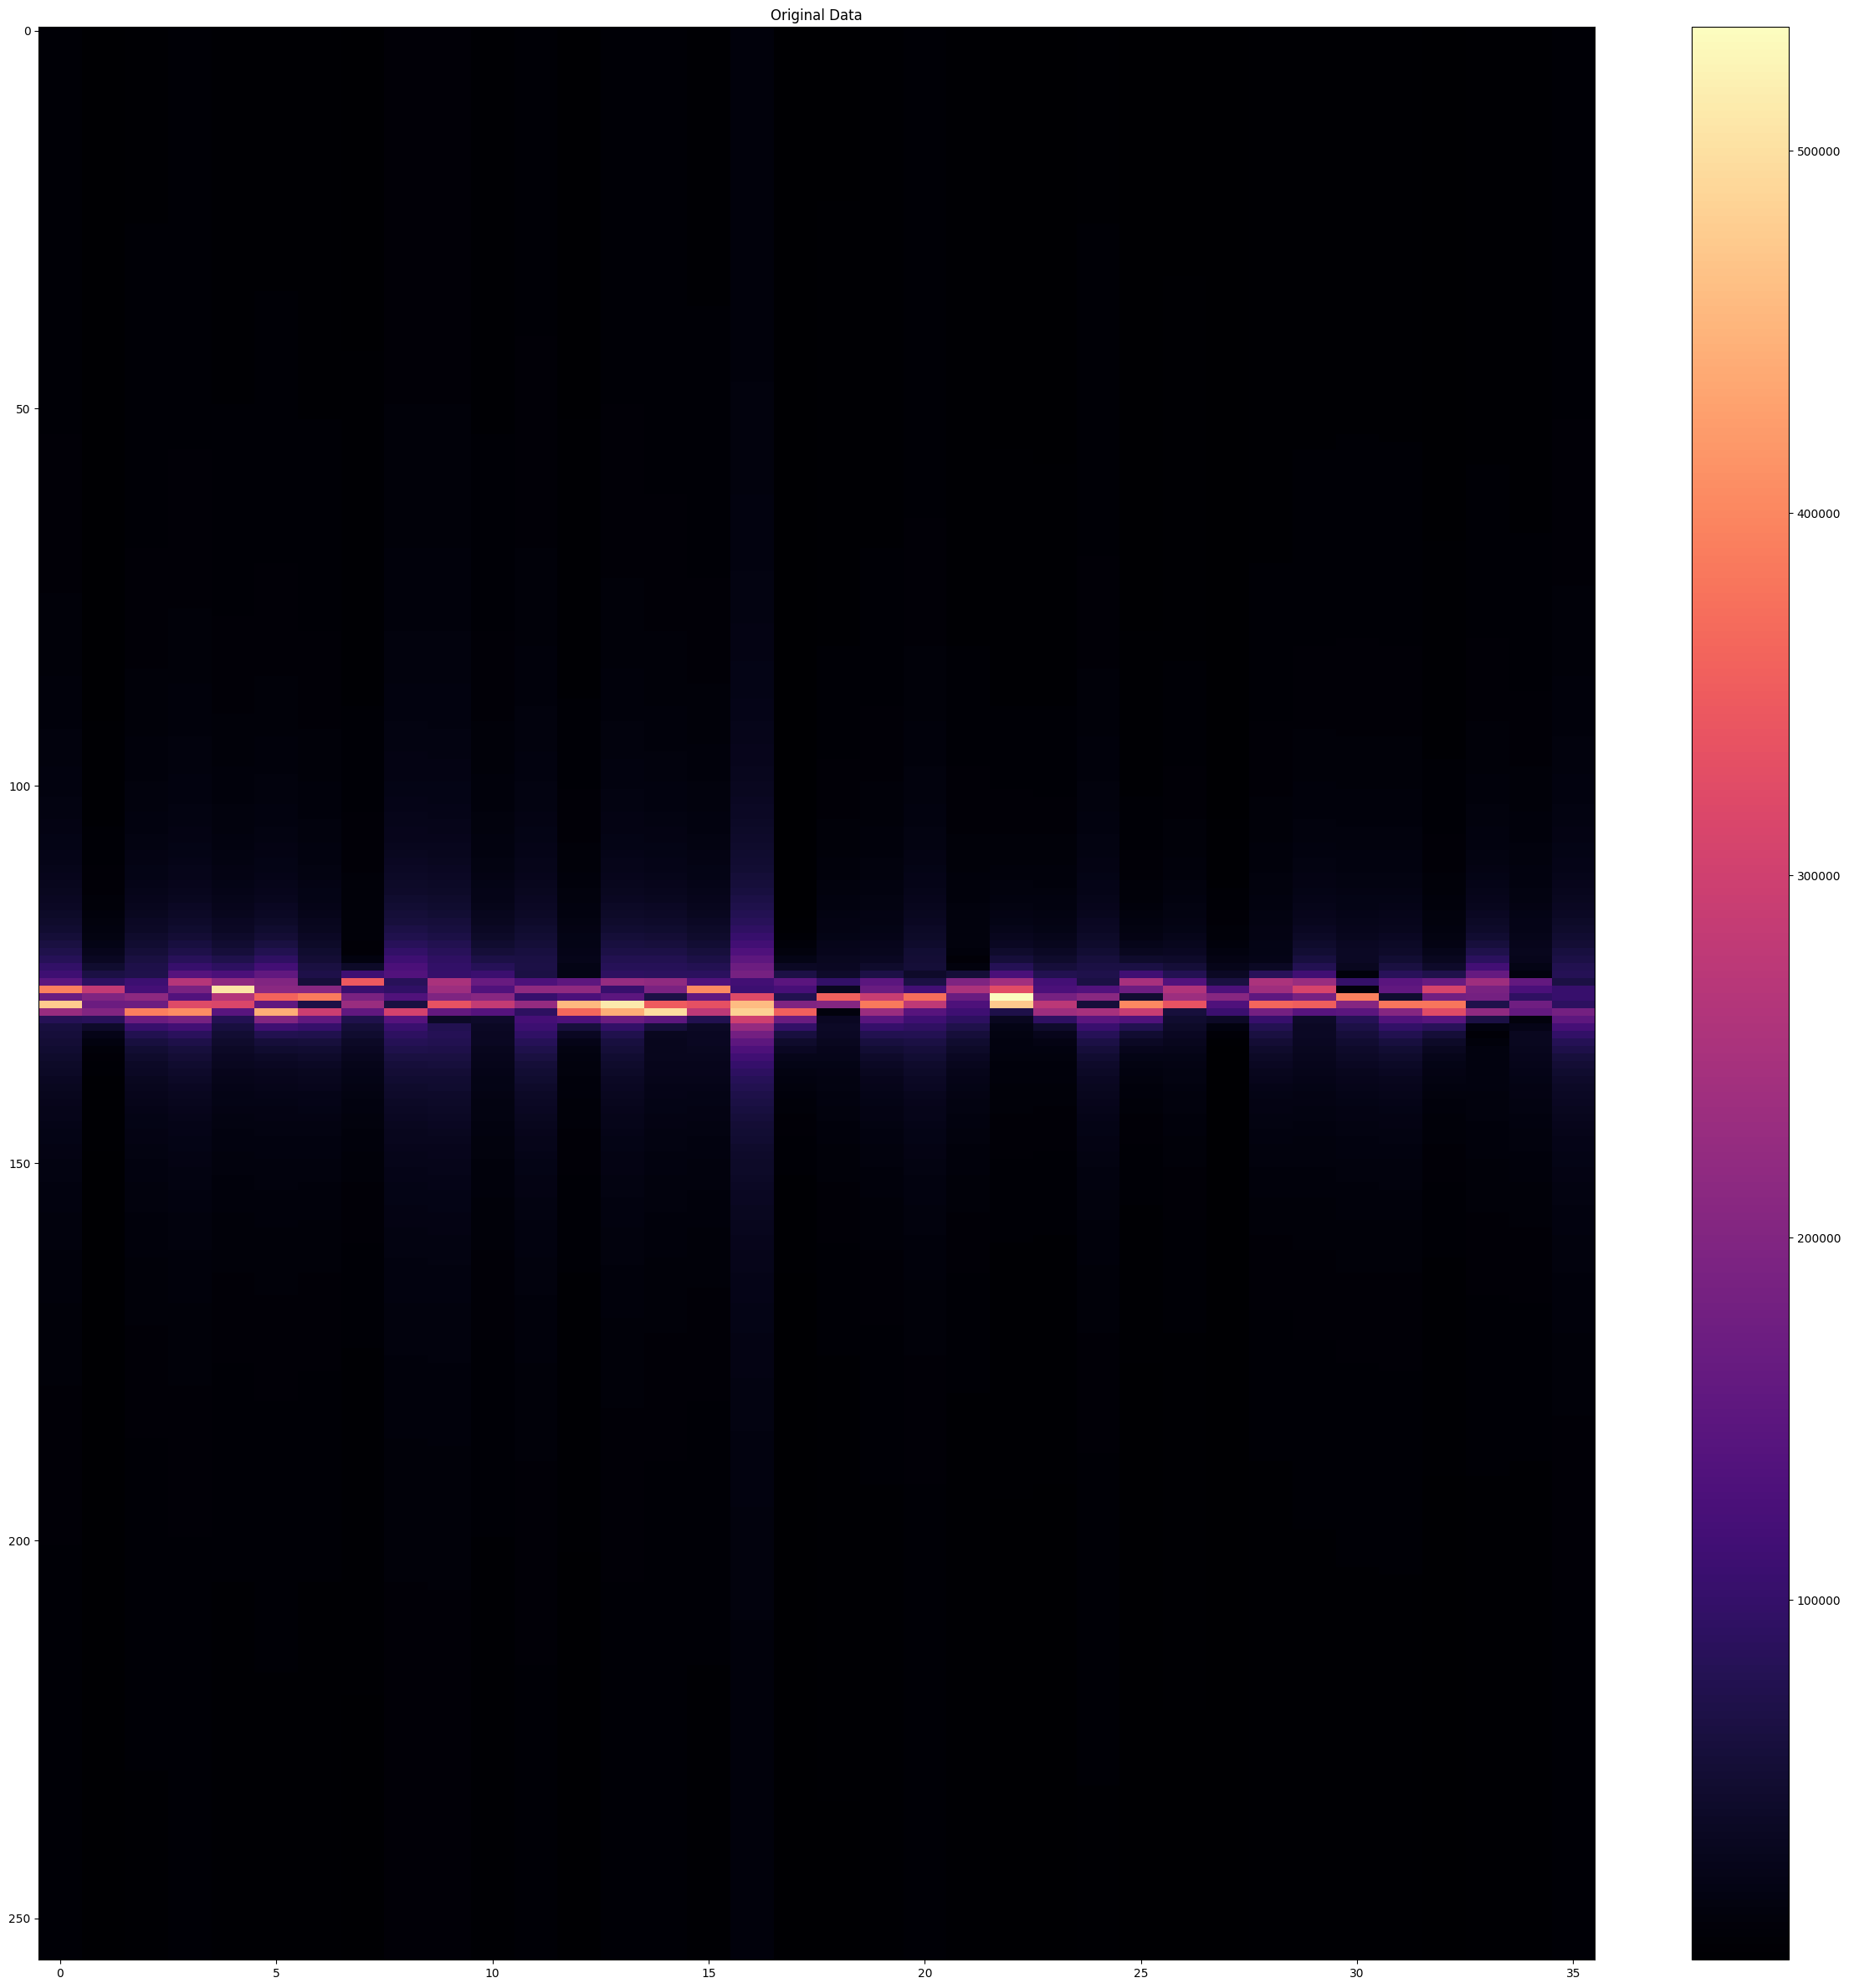

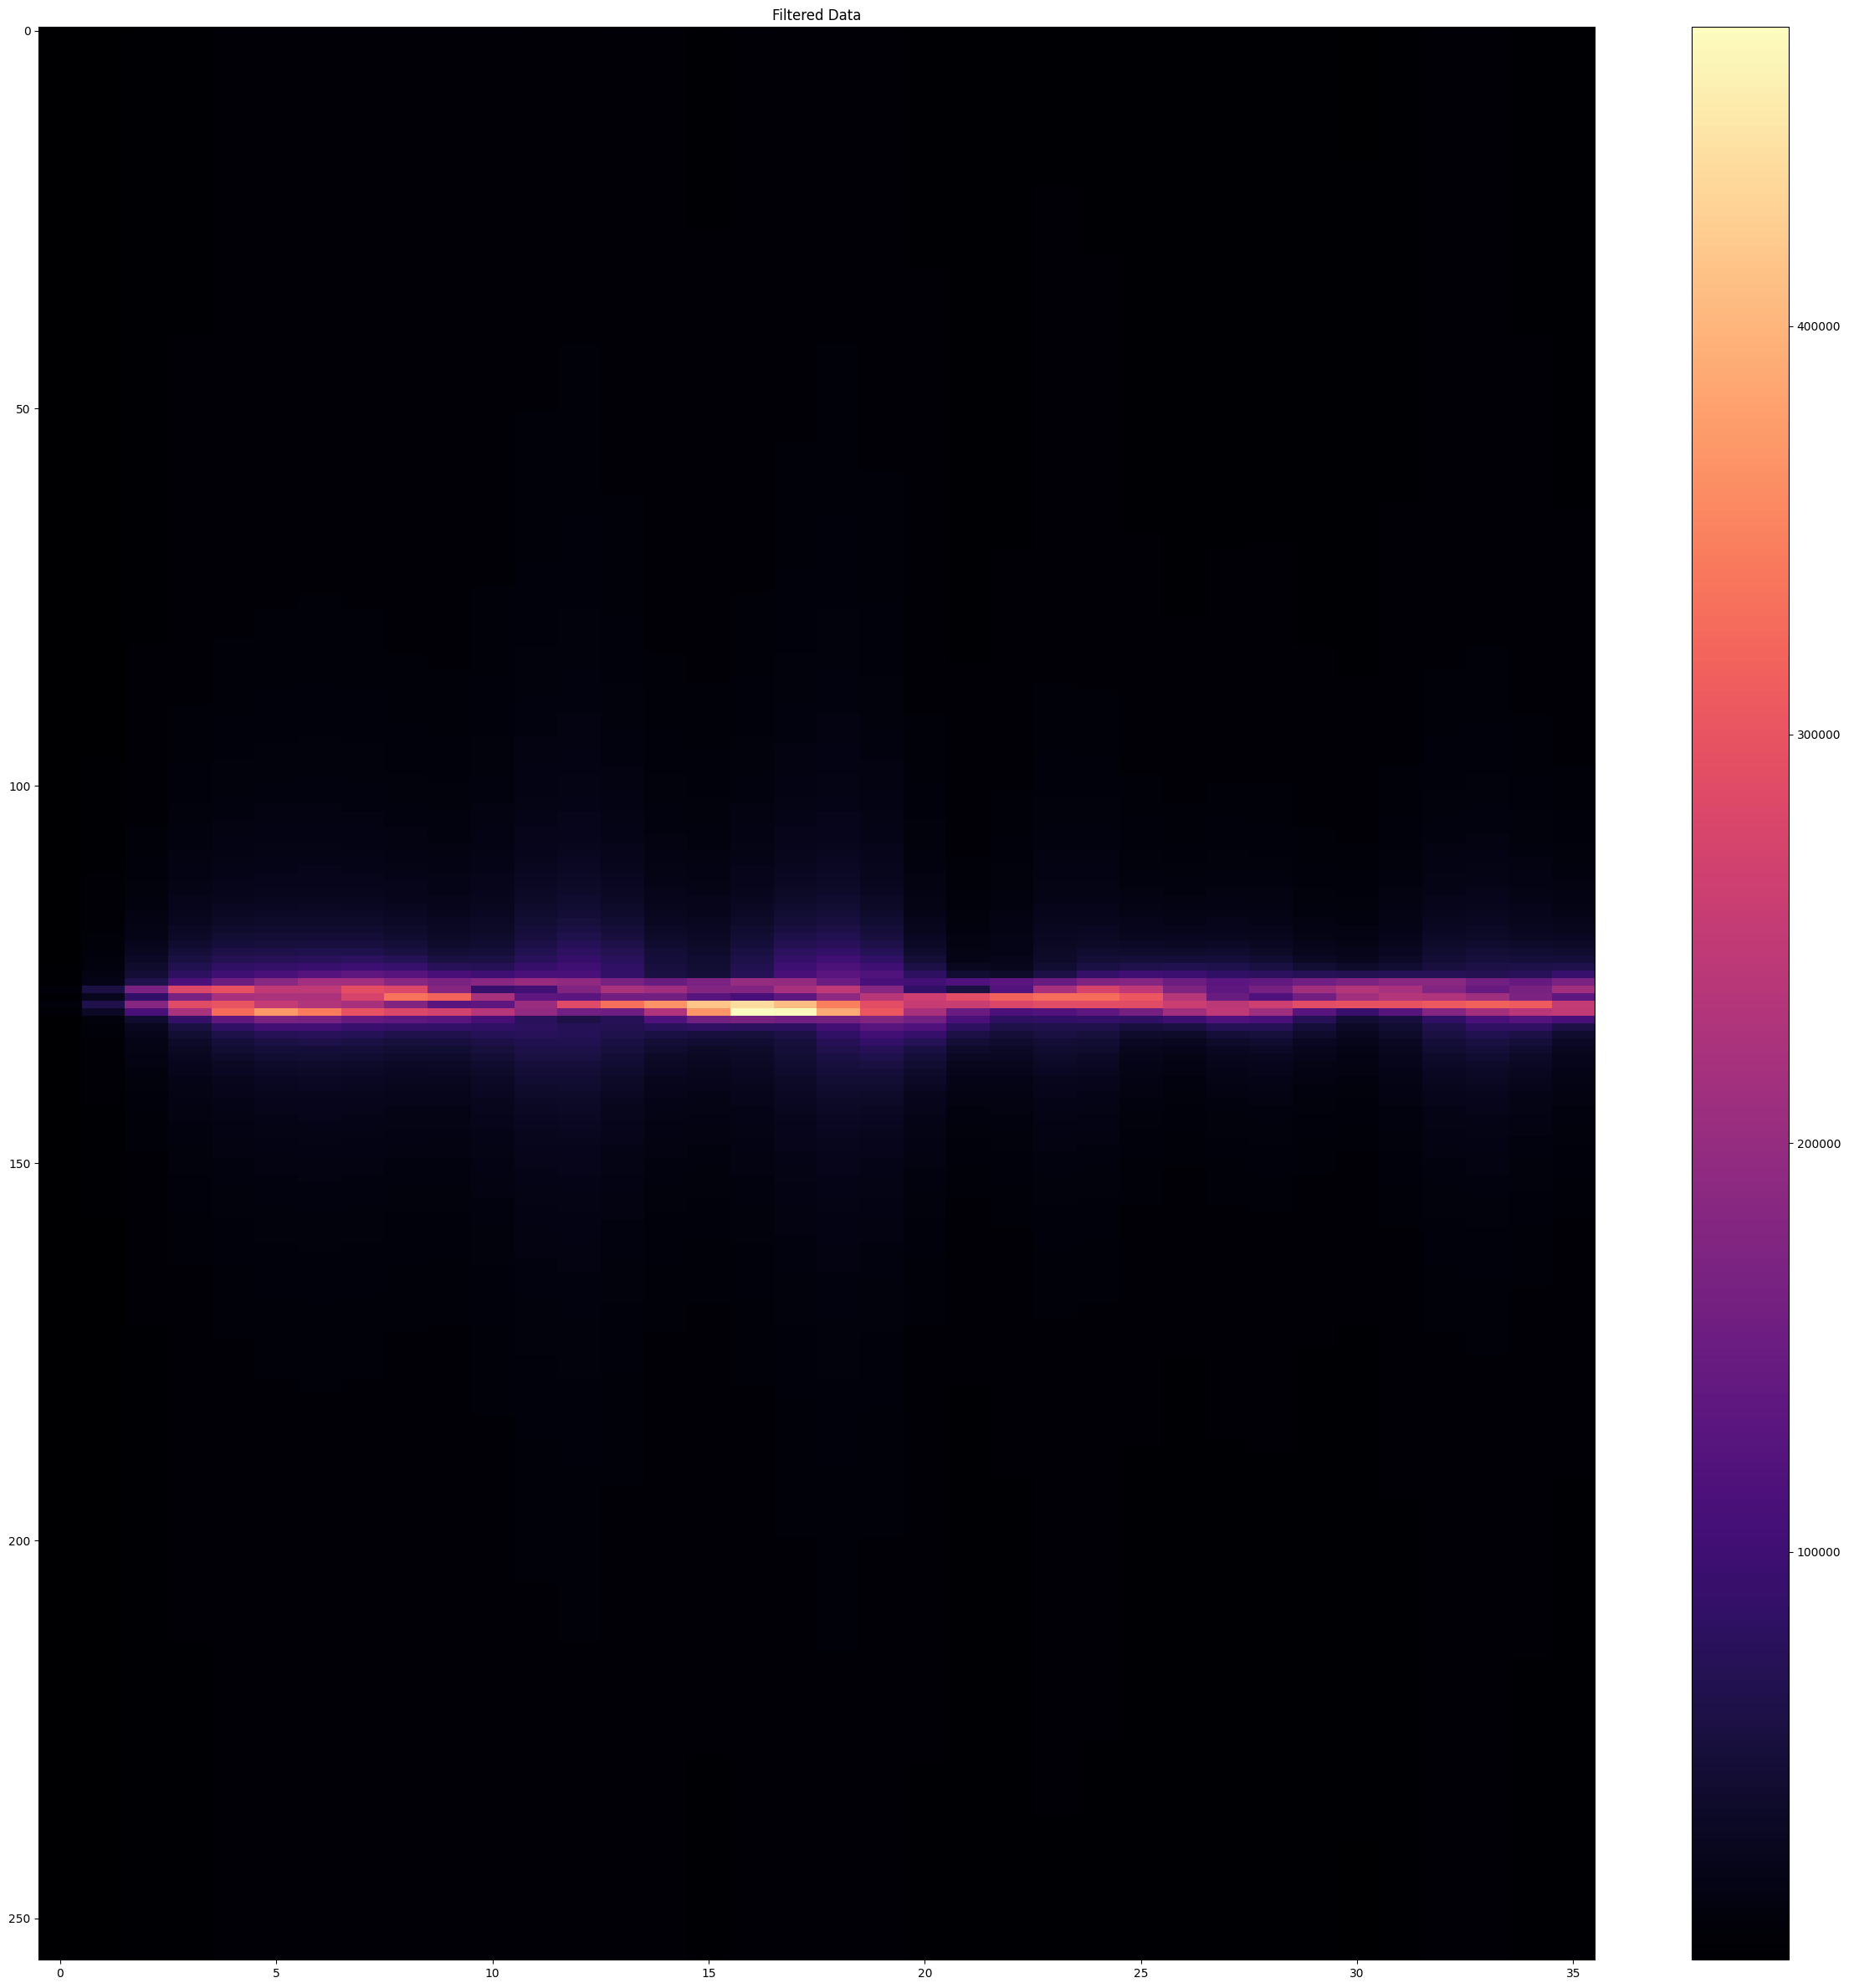

In [ ]:
import numpy as np
from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# assuming fft_data_dim2_abs is your 2D data
plot_data = fft_data_dim2_abs

# Define the sample rate and the desired cutoff frequency
fs = 10.0       # Sample rate, Hz
cutoff = 2.0    # Desired cutoff frequency, Hz

# Apply the filter to each row of the data
filtered_data = np.zeros_like(plot_data)
for i in range(plot_data.shape[0]):
    filtered_data[i, :] = butter_lowpass_filter(plot_data[i, :], cutoff, fs)

# Now you can plot the original and filtered data
import matplotlib.pyplot as plt

# Plot original data
plt.figure(figsize=(30, 30))
plt.imshow(plot_data, aspect='auto', cmap='magma')
plt.title('Original Data')
plt.colorbar()
plt.show()

# Plot filtered data
plt.figure(figsize=(30, 30))
plt.imshow(filtered_data, aspect='auto', cmap='magma')
plt.title('Filtered Data')
plt.colorbar()
plt.show()

Min value: 2536.4460347685135
Max value: 4922939.886670886


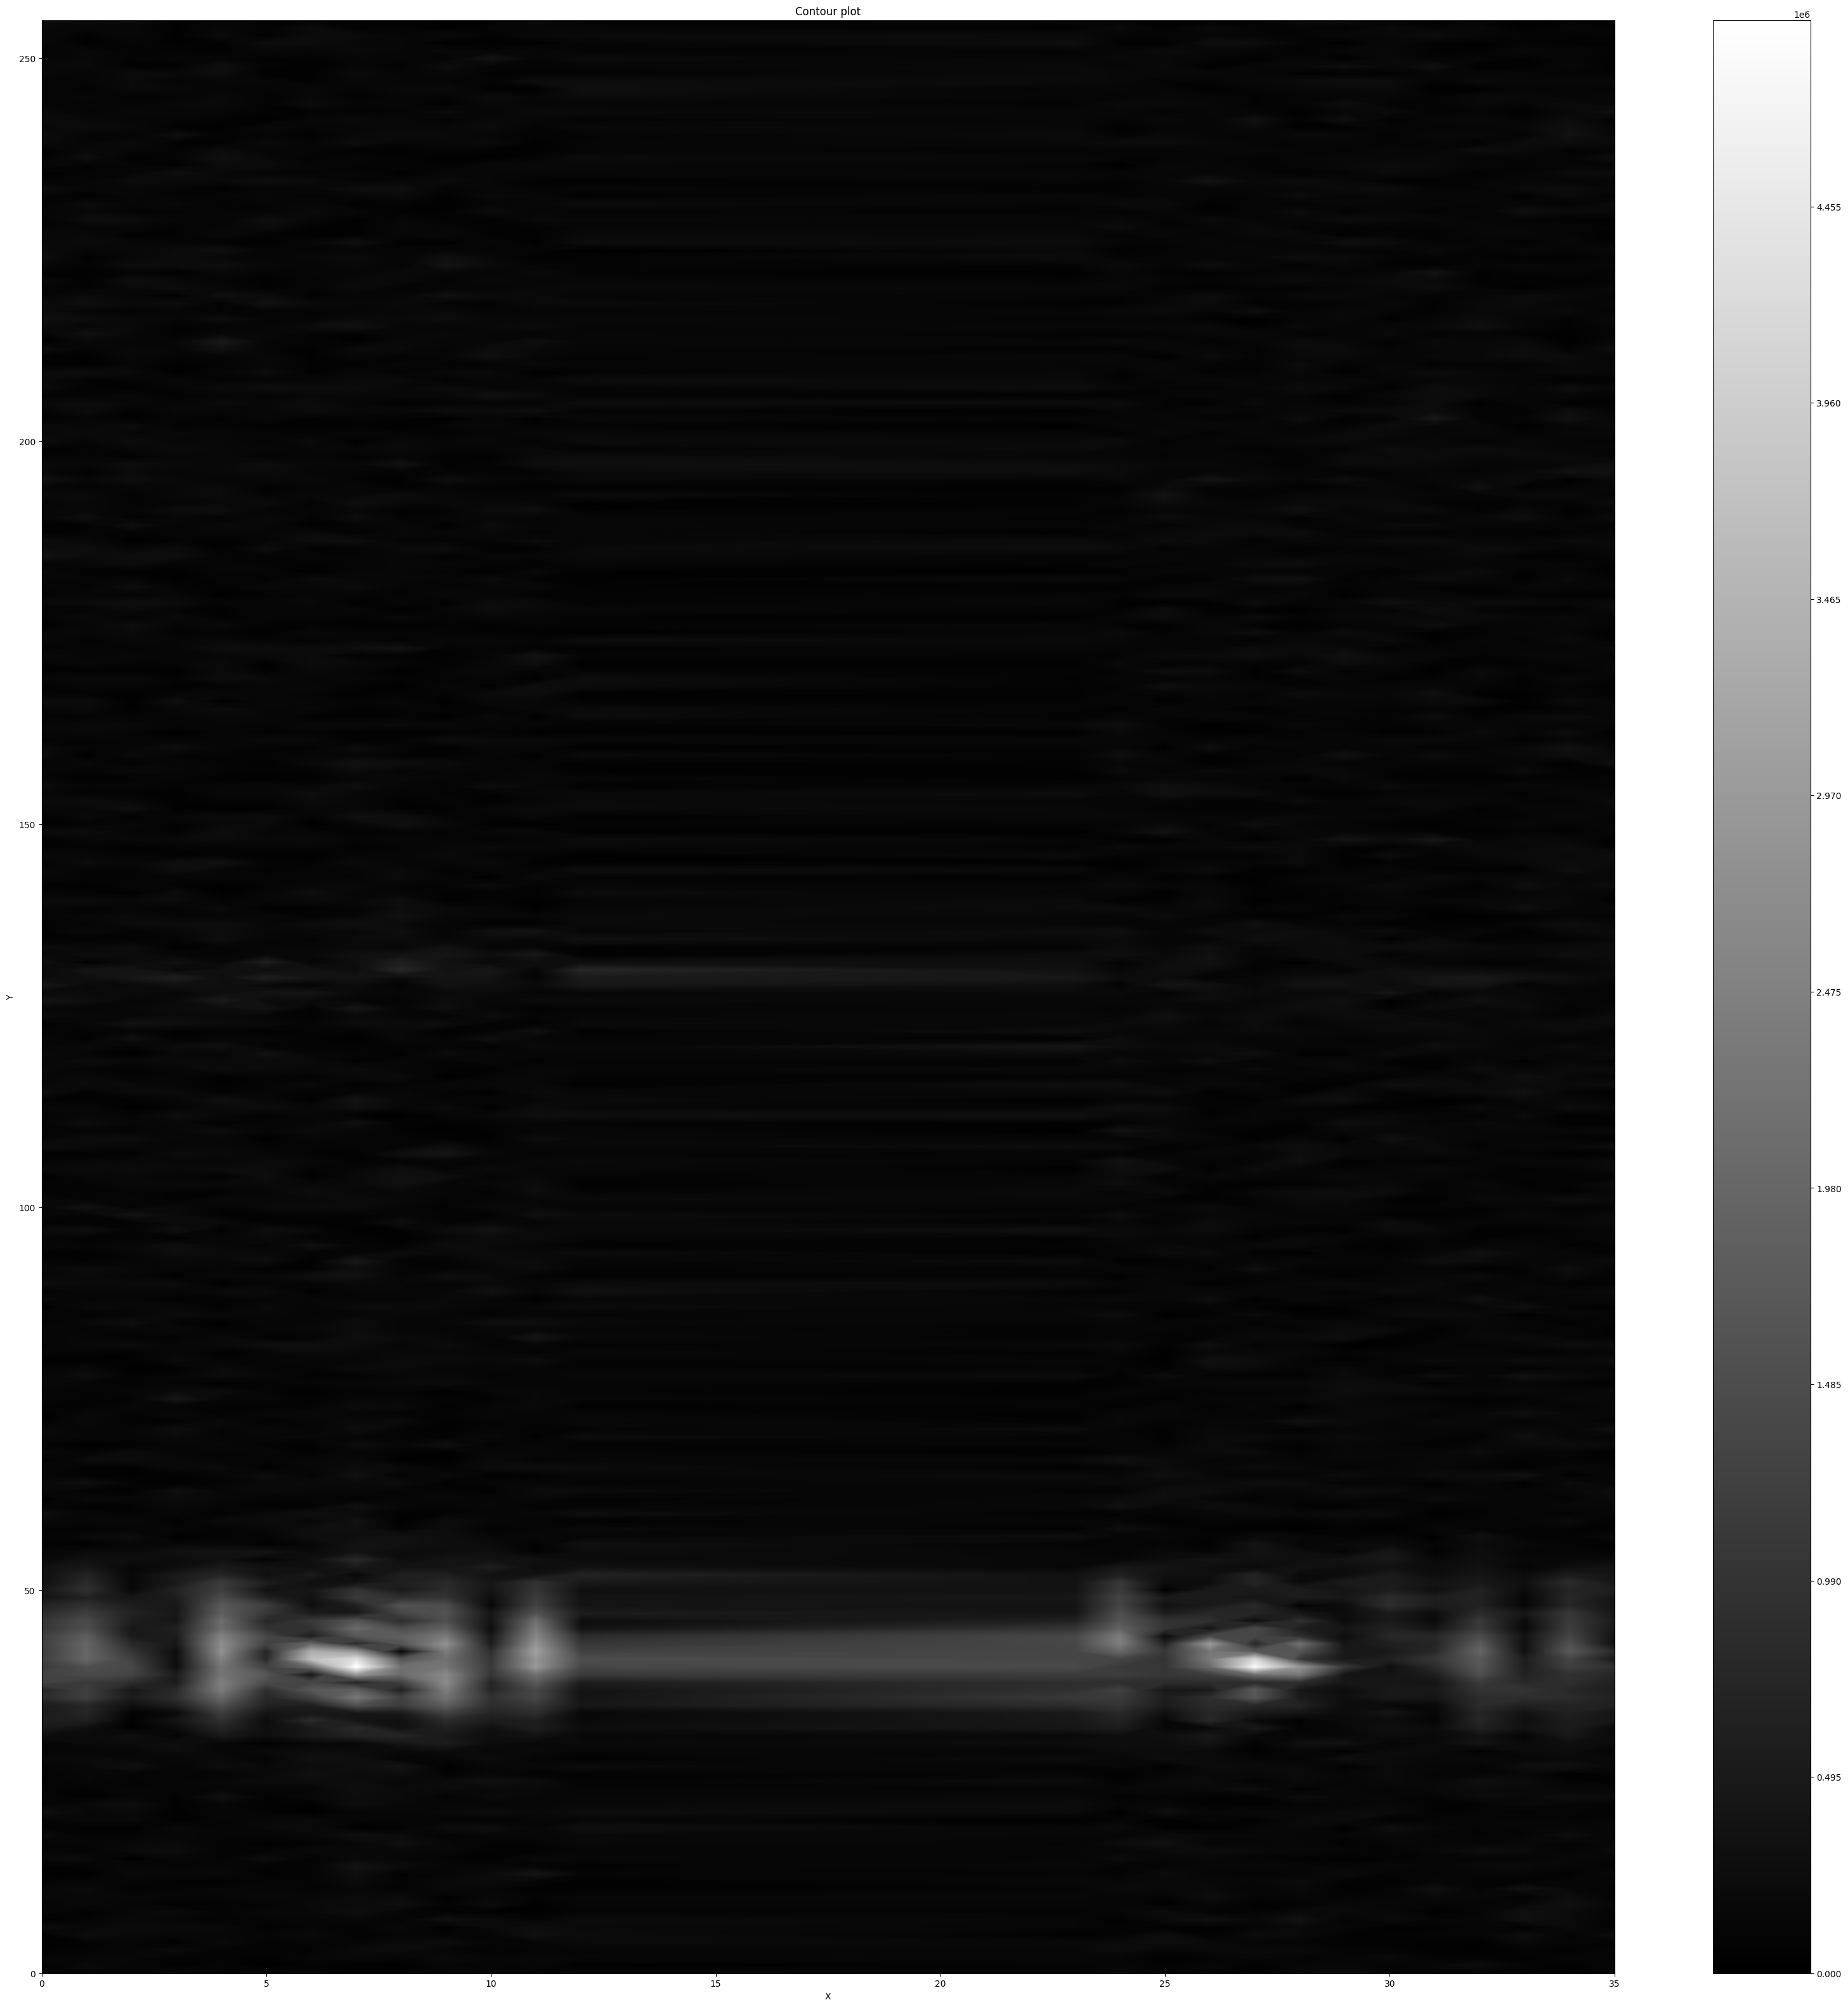

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# assuming fft_data_dim2_abs is the 2D data
plot_data = fft_data_dim2_abs

# generate grid for the contour plot, limiting y to values below 60
x = np.concatenate([np.arange(0, 13), np.arange(23, plot_data.shape[1])])
y = np.arange(0, plot_data.shape[0])
X, Y = np.meshgrid(x, y)

# modify plot_data to remove columns 13 to 22
plot_data = np.concatenate([plot_data[:, :13], plot_data[:, 23:]], axis=1)

# Clip plot_data to a maximum value of 5035420
plot_data = np.clip(plot_data, a_min=None, a_max=5035420)

# print the minimum and maximum values in plot_data
print("Min value:", np.min(plot_data))
print("Max value:", np.max(plot_data))

# Create the contour plot
plt.figure(figsize=(40, 40))
contour = plt.contourf(X, Y, plot_data, levels=1000, cmap='gray')
plt.colorbar(contour)
plt.title('Contour plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [233]:
# Assuming the original 'data' is the 256x36 matrix with the strong signal added.

# Calculate the 95th percentile value to identify the top 5% of the intensity values
top_5_percentile = np.percentile(fft_data_dim2_abs, 100)

# Set the values above the 95th percentile to 0
data_cleared = np.where(fft_data_dim2_abs > top_5_percentile, 0, fft_data_dim2_abs)

# 'data_cleared' is the new matrix with the top 5% intensity values set to 0
data_cleared.shape, np.count_nonzero(data_cleared > top_5_percentile)  # Verify shape and that no values exceed the 95th percentile


((256, 36), 0)

In [228]:
data_cleared - fft_data_dim2_abs
# Calculate the 40th and 60th percentile values as the lower and upper bounds of our pass band
lower_bound = np.percentile(data_cleared, 0)
upper_bound = np.percentile(data_cleared, 100)

# Apply the band filter: Set values outside the lower and upper bounds to 0
band_filtered_data = np.where((data_cleared <= lower_bound) & (data_cleared >= upper_bound), data_cleared, 0)

# The `band_filtered_data` is the new matrix after band filtering
band_filtered_data.shape, lower_bound, upper_bound  # Verify the shape and the bounds


((256, 36), 0.0, 32555.867321162492)

In [ ]:
threshold

3156606.969510895

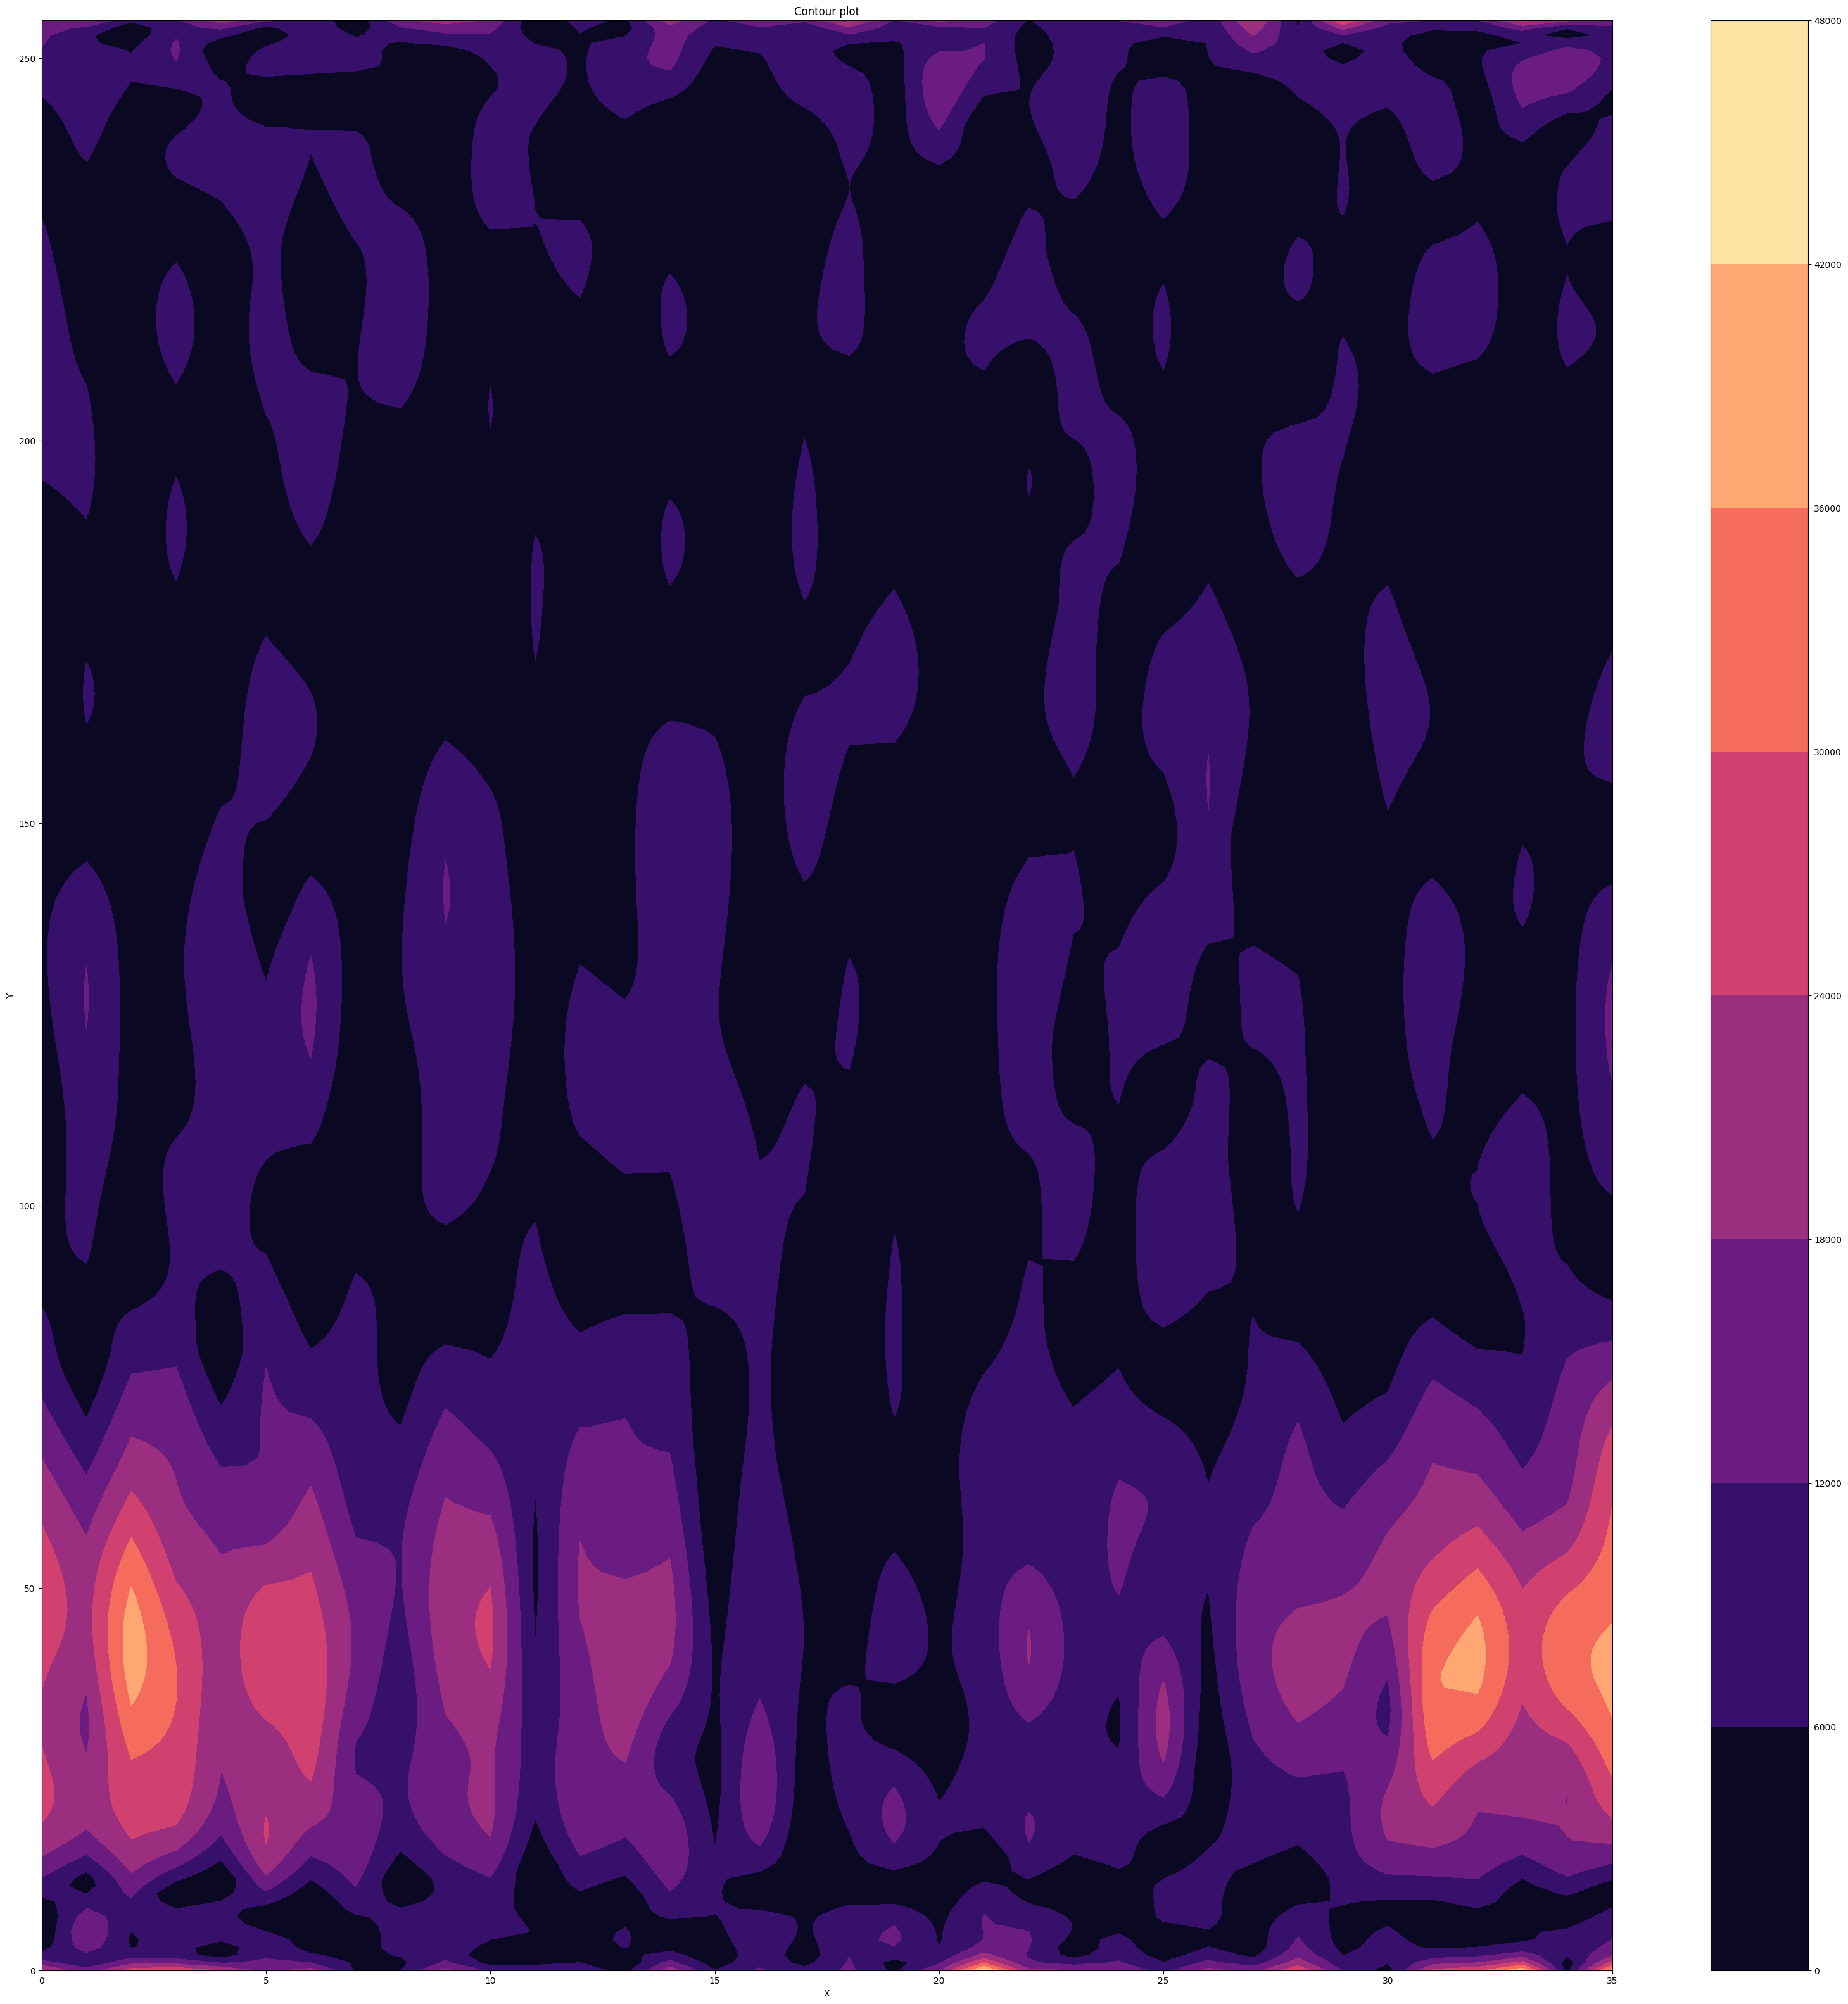

In [234]:
from typing_extensions import dataclass_transform

import matplotlib.pyplot as plt
import numpy as np



plot_data = data_cleared
# assuming fft_data_dim2_abs is the 2D data
# generate grid for the contour plot
x = np.arange(0, plot_data.shape[1])
y = np.arange(0, plot_data.shape[0])
X, Y = np.meshgrid(x, y)

# Create the contour plot
plt.figure(figsize=(40, 40))
plt.contourf(X, Y, plot_data,  cmap='magma')  # Increase levels for higher resolution
plt.colorbar()  # optional, to show color scale
plt.title('Contour plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show() # Change colormap


#### Orginal stacked

In [ ]:
plot_columns_with_offsets_no_norm(data,1,1,0,0)

In [ ]:
!pip install dash
!pip install jupyter_dash
!pip install plotly
!pip install ngrok

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import numpy as np
from flask import send_file
import io

# Assuming 'data' is your 256x36 matrix
data = np.random.normal(loc=20, scale=5, size=(256, 36))

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.RangeSlider(
        id='percentile-slider',
        min=0,
        max=100,
        step=0.1,
        value=[0, 10],
        marks={i: '{}'.format(i) for i in range(0, 101, 25)}
    ),
    dcc.Graph(id='interactive-plot'),

])

@app.callback(
    Output('interactive-plot', 'figure'),
    [Input('percentile-slider', 'value')])
def update_figure(percentile_values):
    lower_threshold, upper_threshold = np.percentile(data, percentile_values)

    # Apply band filter
    filtered_data = np.where((data >= lower_threshold) & (data <= upper_threshold), data, 0)

    # Create a contour plot with plotly
    contour = go.Contour(z=filtered_data, colorscale='Viridis')
    layout = go.Layout(title='Interactive Band Filter', width=800, height=600)
    fig = go.Figure(data=[contour], layout=layout)

    return fig

@app.callback(
    Output("download", "data"),
    [Input("download-button", "n_clicks"),
     Input('interactive-plot', 'figure')],
    prevent_initial_call=True,
)
def generate_html(n_clicks, figure):
    if n_clicks:
        # Convert the current plot to an HTML string
        html_string = plotly.io.to_html(figure)

        # Convert the HTML string to bytes and create a BytesIO object
        html_bytes = html_string.encode()
        html_file = io.BytesIO(html_bytes)

        # Serve the BytesIO object as a file
        return send_file(
            html_file,
            mimetype='text/html',
            as_attachment=True,
            attachment_filename='plot.html'
        )

app.run_server(mode='external')

<IPython.core.display.Javascript object>

### Ployfit

In [ ]:
complex_numbers_2 = complex_numbers.reshape(36, 256).T

In [ ]:
np.real(fft_data_dim2_shift_1)

array([[  626005.61044303, -1095953.23293013,  -142511.68592958, ...,
        -1021897.0660393 ,   252456.89257753,   320579.79995266],
       [  389078.83840183,  -842548.04629484,    90009.1748116 , ...,
         -493600.9012663 ,   130107.41848565,   -82482.86400342],
       [  223780.6862239 ,  -626591.75606476,   224855.62836463, ...,
         -125077.36255455,    24191.41387055,  -357666.60074483],
       ...,
       [ -161218.16283961,  -155172.83743852,   -29839.27809389, ...,
           32566.21834606,    70364.71265658,   202548.31392501],
       [  -86185.01407809,    60619.12602194,   -79864.7776348 , ...,
         -112641.38570514,   -50418.32159239,   153236.65286387],
       [   18575.44981642,   380270.93333496,  -158150.55224082, ...,
         -333742.16965452,  -219833.79438797,    92161.76170196]])

In [ ]:
import numpy as np

input_data = complex_numbers_2
# Create an array for x values
x = np.arange(256)


# Initialize arrays to store fitted values
fitted_values_real = np.zeros_like(np.real(input_data))
fitted_values_imag = np.zeros_like(np.imag(input_data))

# loop iterates over the number of columns in fft_data_dim1_shift_0
for i in range(input_data.shape[1]):
    # Separate real and imaginary parts
    y_real = np.real(input_data)[:, i]
    y_imag = np.imag(input_data)[:, i]

    # Fit a degree 12 polynomial (change 2 to whatever degree you want)
    # 12 degree polynomial is fitted to the real and imaginary parts, return the coeff numbers
    coeff_real = np.polyfit(x, y_real, 5)
    coeff_imag = np.polyfit(x, y_imag, 5)

    # get the polynomial fitted data at each x
    fitted_values_real[:, i] = np.polyval(coeff_real, x)
    fitted_values_imag[:, i] = np.polyval(coeff_imag, x)

# Combine real and imaginary parts to get fitted values
fitted_values = fitted_values_real + 1j * fitted_values_imag

In [ ]:
fitted_values

In [ ]:
fitted_values.shape

(256, 36)

In [ ]:
fitted_values = np.fft.fftshift(fitted_values)

In [ ]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# READ THE 2048 X 2048 MATRIX
##############################

input_data = fitted_values
#############################

# FFT the 2048 x 2048 matrix VIA THE AXIS 1
fft_data_dim1_axis_0 = np.fft.fft(input_data,axis=0)

# SHIFT OVER AXIS 1
fft_data_dim1_shift_0 = np.fft.fftshift(fft_data_dim1_axis_0,axes=(0)
)

# GET THE REAL NUMBER PART OF FIRST MATRIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim1_real = np.real(fft_data_dim1_shift_0)
# GET THE IMAG PART OF THE FIRST MARTIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim1_imag = np.imag(fft_data_dim1_shift_0)
# GET THE ABS VALUE OF FIRST MATRIX, RETURN 2048 X 2048 MATIRX FOR ABS VALUE
fft_data_dim1_abs = abs(fft_data_dim1_shift_0)





# FFT the 2048 x 2048 matrix VIA THE AXIA 2
fft_data_dim2_axis_1 = np.fft.fft(fft_data_dim1_shift_0, axis=1)
# SHIFT OVER AXIA 2
fft_data_dim2_shift_1 = np.fft.fftshift(fft_data_dim2_axis_1, axes=(1))



# GET THE REAL NUMBER PART OF SECOND MATRIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim2_real = np.real(fft_data_dim2_shift_1)
# GET THE IMAG PART OF THE SECOND MARTIX, RETURN 2048 X 2048 MATRIX FOR REAL NUMBER
fft_data_dim2_imag = np.imag(fft_data_dim2_shift_1)
# GET THE ABS VALUE OF SECOND MATRIX, RETURN 2048 X 2048 MATIRX FOR ABS VALUE
fft_data_dim2_abs = np.abs(fft_data_dim2_shift_1)

##### stacked

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_columns_with_offsets_no_norm(data, start_column, end_column, x_offset, y_offset):

    # Create a figure and axes
    fig = plt.figure(figsize=(40, 40))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each column as a separate line with offsets
    for i in range(start_column-1, end_column):
        x = np.arange(data.shape[0]) + i*x_offset
        y = np.full((data.shape[0],), i)  # y is a constant for each line
        z = data[:, i] + i*y_offset
        ax.plot3D(x, y, z, label=f'Spectrum {i+1}')

    # Add labels
    ax.set_xlabel('Rows (with offset)')
    ax.set_ylabel('Spectra')
    ax.set_zlabel('Non-normalized Values (with offset)')

    ax.set_title(f'Spectrum {start_column} to {end_column}', size=28)

    # Show the plot
    plt.show()

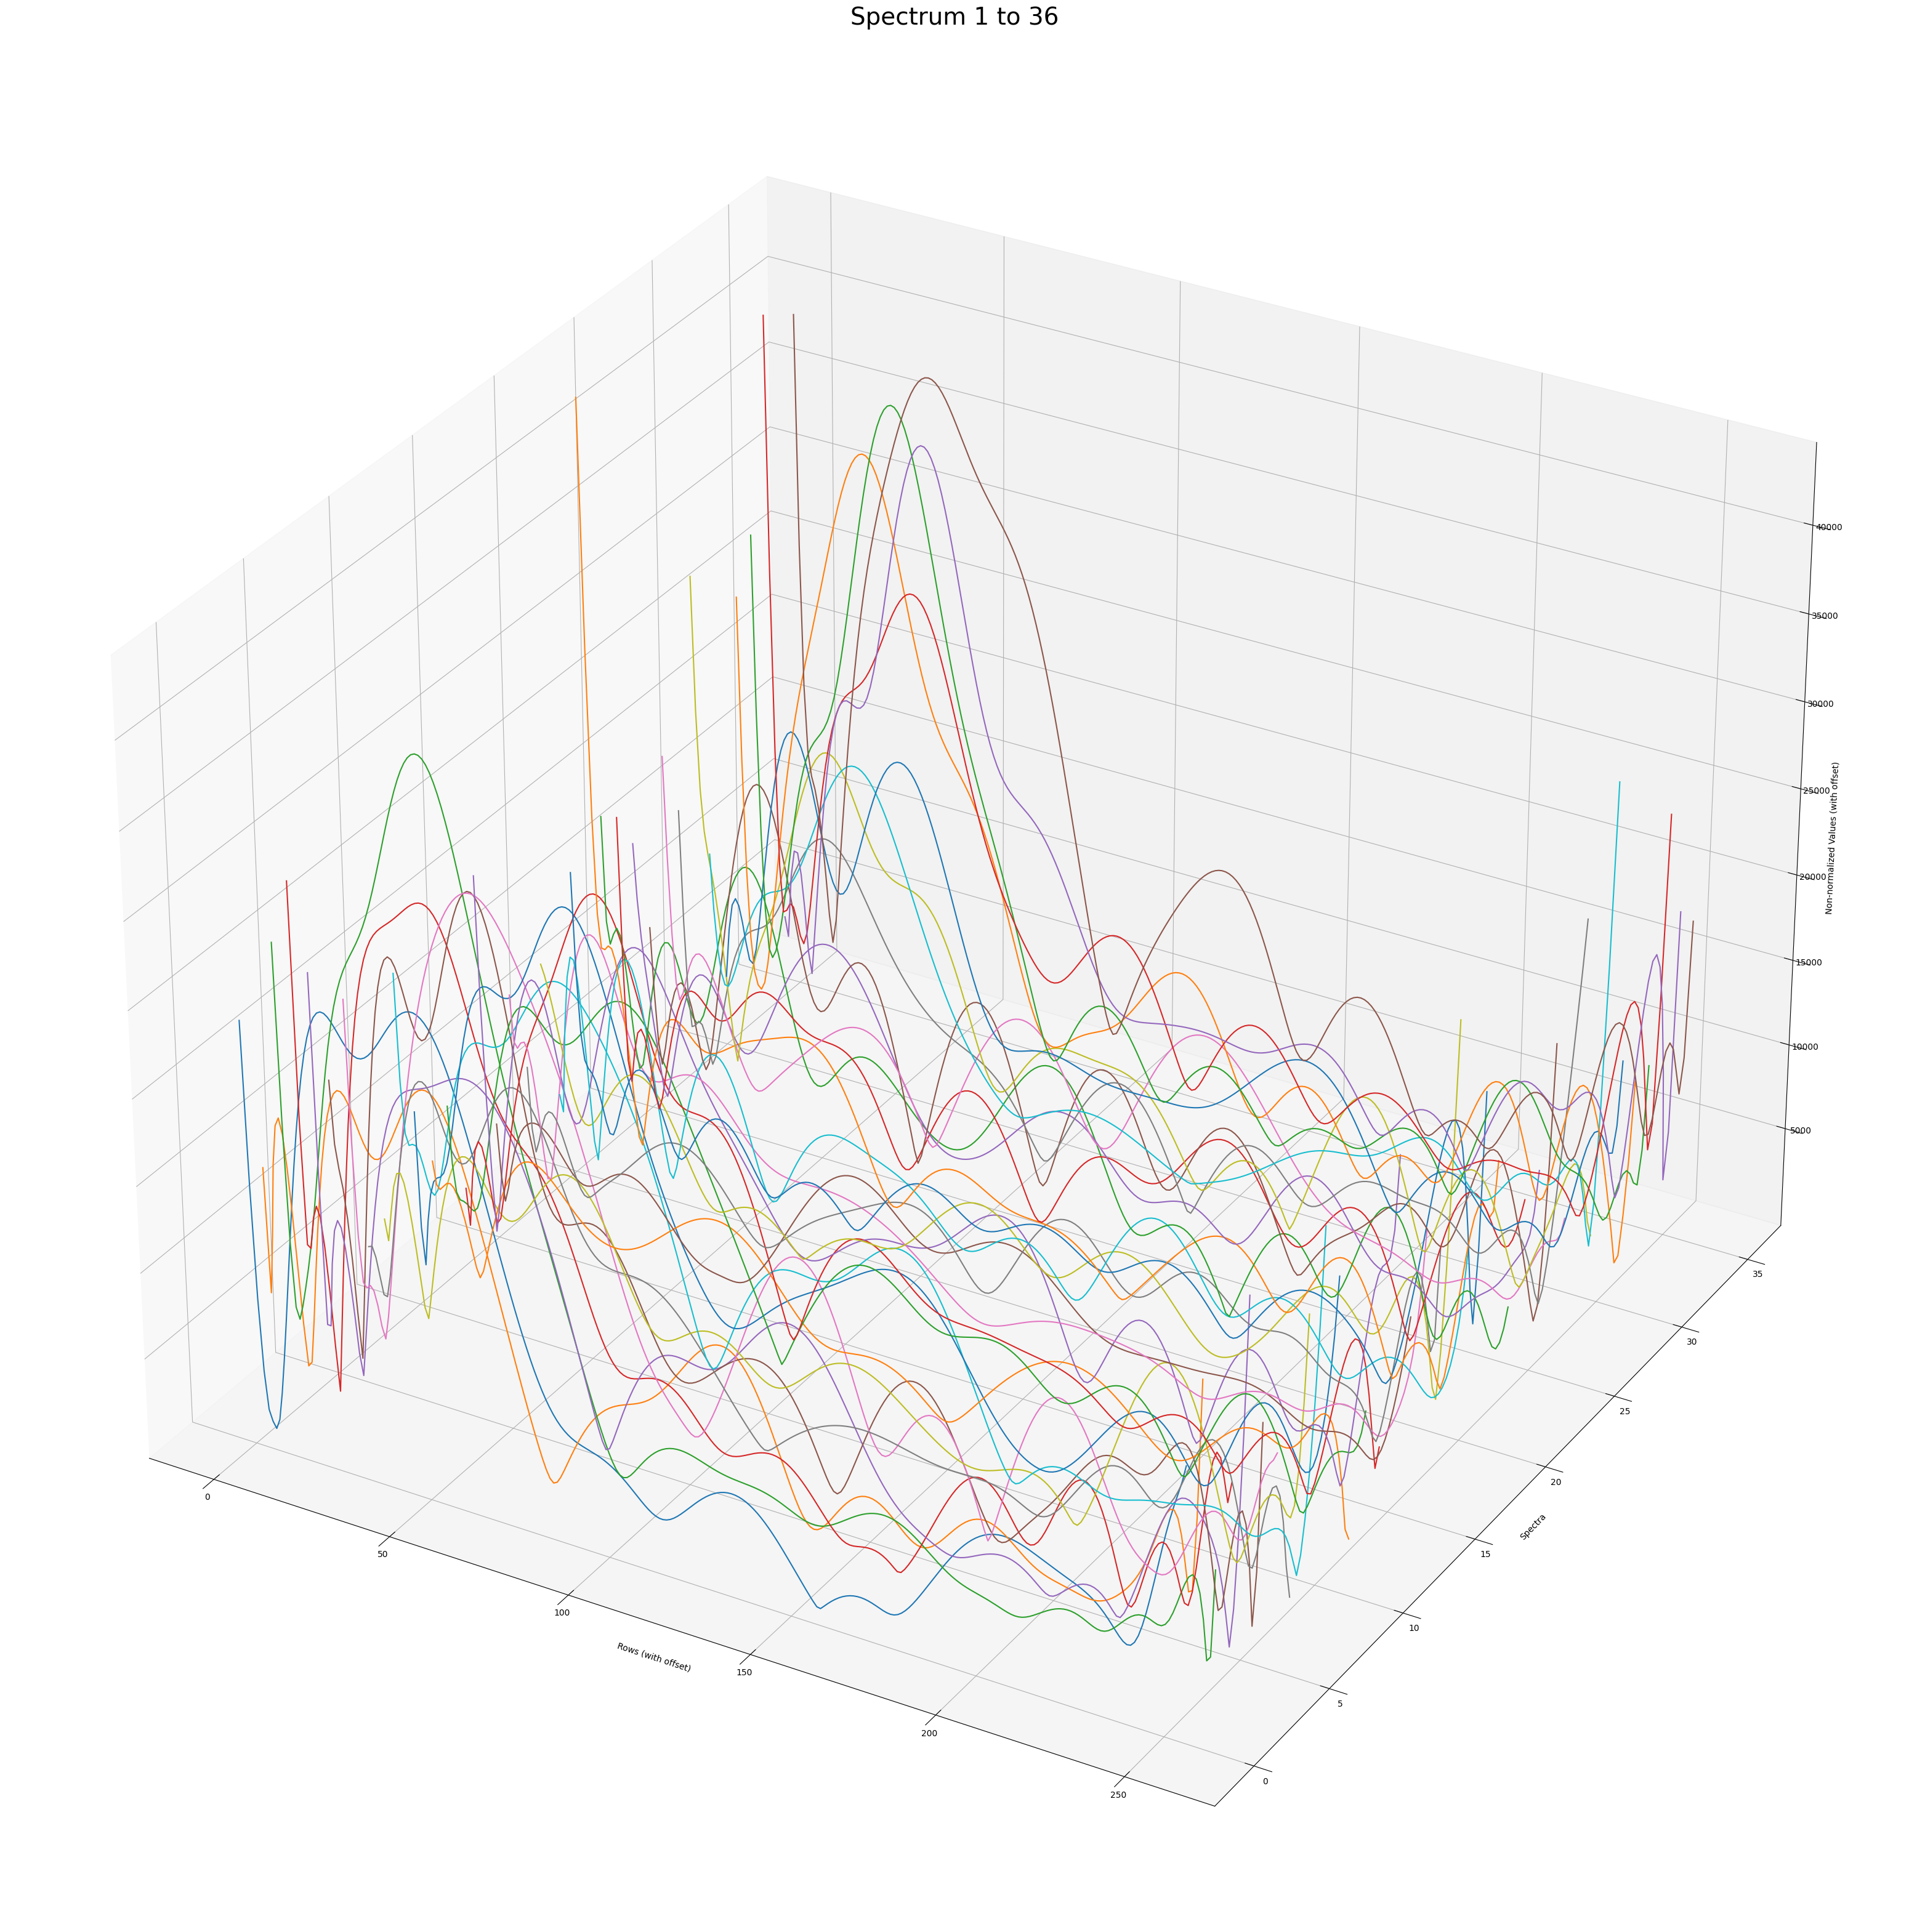

In [235]:
plot_columns_with_offsets_no_norm(data_cleared,1,36,0,0)

#### 2d

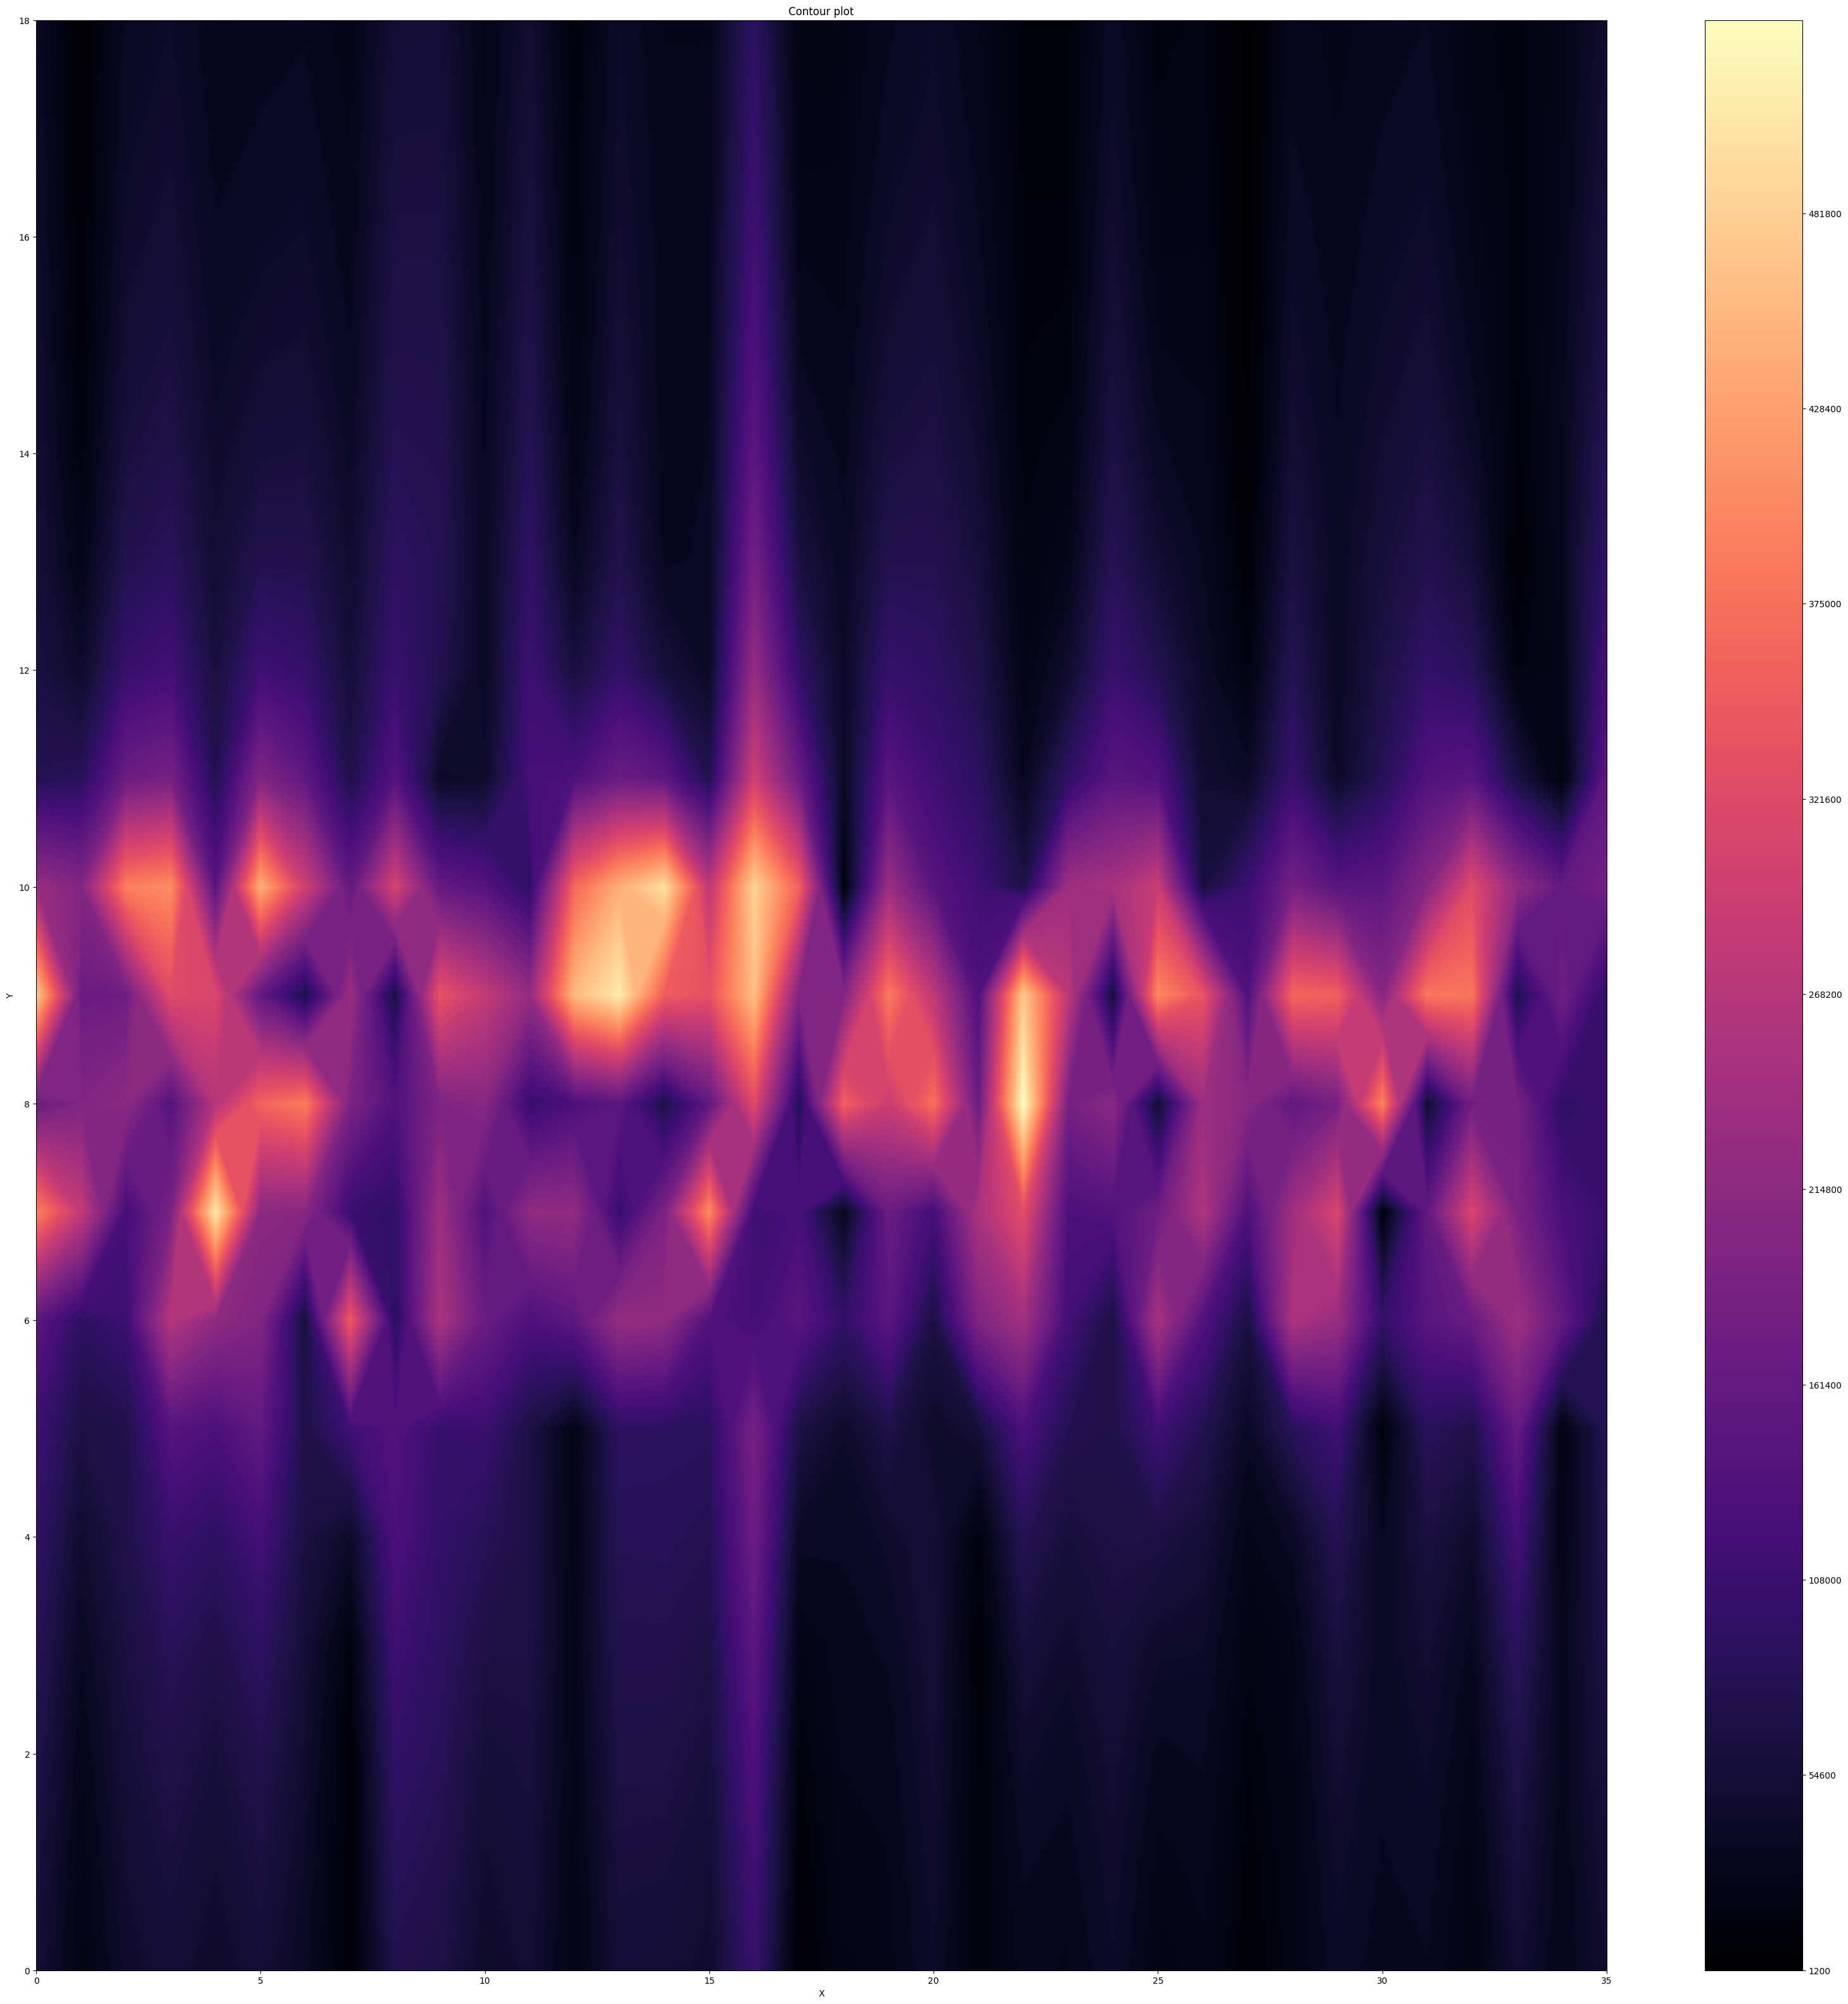

In [ ]:
from typing_extensions import dataclass_transform

import matplotlib.pyplot as plt
import numpy as np



plot_data = fft_data_dim2_abs[120:139,]
# assuming fft_data_dim2_abs is the 2D data
# generate grid for the contour plot
x = np.arange(0, plot_data.shape[1])
y = np.arange(0, plot_data.shape[0])
X, Y = np.meshgrid(x, y)

# Create the contour plot
plt.figure(figsize=(40, 40))
plt.contourf(X, Y, plot_data, levels=1000, cmap='magma')  # Increase levels for higher resolution
plt.colorbar()  # optional, to show color scale
plt.title('Contour plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show() # Change colormap



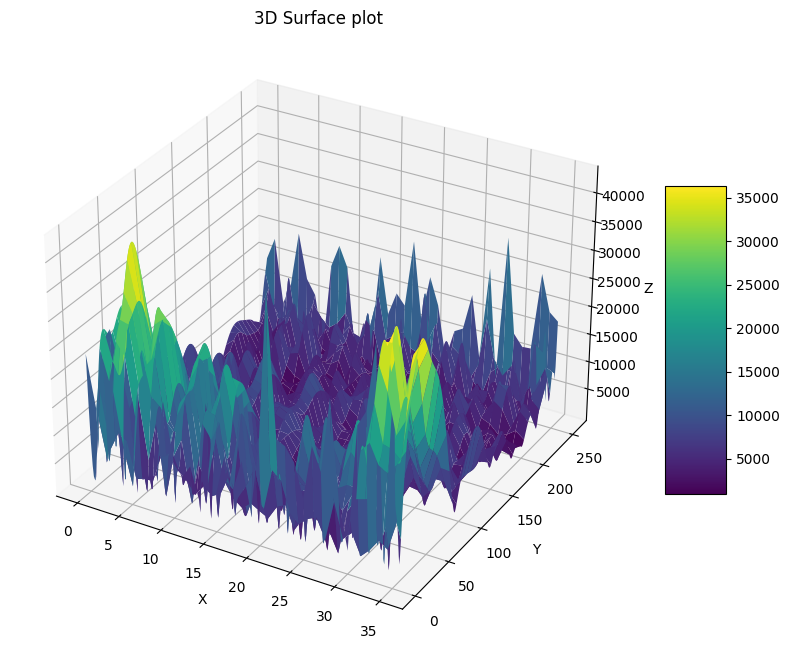

In [215]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# assuming fft_data_dim2_abs is the 2D data
# generate grid for the 3D plot
x = np.arange(0, fft_data_dim2_abs.shape[1])
y = np.arange(0, fft_data_dim2_abs.shape[0])
X, Y = np.meshgrid(x, y)

# create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, fft_data_dim2_abs, cmap='viridis')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_title('3D Surface plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [ ]:
# install tools for pdf output

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [ ]:
# output as PDF
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/MRS_2D.ipynb' --output-dir /content/

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/MRS_2D.ipynb to pdf
[NbConvertApp] Support files will be in MRS_2D_files/
[NbConvertApp] Making directory ./MRS_2D_files
[NbConvertApp] Making directory ./MRS_2D_files
[NbConvertApp] Making directory ./MRS_2D_files
[NbConvertApp] Writing 73328 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1443102 bytes to /content/MRS_2D.pdf
